In [5]:
import os, sys, importlib

# Point Python to your project root (parent of the notebooks/ folder)
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import notebook_exports as ne
importlib.reload(ne)  # pick up latest edits

<module 'notebook_exports' from 'C:\\Users\\redae\\Jupyter\\Projects\\Luis Fiverr two models forecast\\Forcasting Portal MVP - PROJECT PART 2\\notebook_exports.py'>

In [7]:
import pandas as pd
import numpy as np
import re
import copy
import os, sys, glob
from IPython.display import display
import matplotlib.pyplot as plt
from typing import Dict
from typing import Callable, List
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from notebook_exports import seasonal_naive_next, forecaster_holt_winters, ensure_month_index, get_itemcodes_allocated_view, ensure_month_index, seasonal_naive_next, forecaster_holt_winters

In [11]:
xls = pd.ExcelFile("Jan-Aug_ SOP Sept-Dec (1).xlsx")
xls.sheet_names

['Frecuency', 'Working Days', 'Temperature', 'Customers', 'Items', 'Base']

In [12]:
file_path = "Jan-Aug_ SOP Sept-Dec (1).xlsx"
sheet_names = ["Base", "Customers", "Items", "Working Days", "Temperature", "Frecuency"]

previews = {}
for name in sheet_names:
    print(f"\n--- {name} ---")
    df = pd.read_excel(file_path, sheet_name=name, header=None, nrows=12)
    previews[name] = df  # keep for reference
    display(df)


--- Base ---


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,Gross Profit (Sale Details) (Exported on 10/01...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All Warehouses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Delivery dates From 01/01/2025 To 09/30/2025 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Order by Line Gross Profit (DESCENDING) ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Customer ID,Customer Name,Shipto Name,Customer PO #,Delivery Date,Invoice Number,Brand,Item Description,Itemcode,Packsize,...,Address - 2,City,State,Zip,Trim,Month,Group,Customer Group,weekday,Working Days
5,PATITO-000001,"Industria Los Patitos, S.A.","Industria Los Patitos, S.A.",55615,2025-09-30 00:00:00,000332254-001,,Minced Garlic EVOO 12x8oz - ESCAZU,310022,,...,,La Casona Del Cerdo Bodegas,HR,40801-,PATITO-000001,2025-9,Group 3,"Industria Los Patitos, S.A.",3,21
6,NATURX-000001,VEGETABLE JUICES INC.,VEGETABLE JUICES INC.,RCVJ25VJ00002-16,2025-05-21 00:00:00,000324502-021,,Fresh Ginger 30 LB China,520001,,...,,BEDFORD PARK,IL,60638-,NATURX-000001,2025-5,Group 5-2,Vegetable Juices,4,21
7,DDR-000001,"Darden Restaurants, Inc",DARDEN DIRECT DISTRIBUTION INC,49458485,2025-05-21 00:00:00,000324949-002,,Minced Garlic 6x4.5lbs Garland,390018,,...,,BOLONGBROOK,IL,60490,DDR-000001,2025-5,Group 3,Darden Restaurants,4,21
8,DDR-000001,"Darden Restaurants, Inc",DARDEN DIRECT DISTRIBUTION INC,49460822,2025-06-03 00:00:00,000325407-002,,Minced Garlic 6x4.5lbs Garland,390018,,...,,BOLONGBROOK,IL,60490,DDR-000001,2025-6,Group 3,Darden Restaurants,3,21
9,NATURX-000001,VEGETABLE JUICES INC.,VEGETABLE JUICES INC.,RCVJ25VJ00002-15,2025-05-21 00:00:00,000324501-021,,Fresh Ginger 30 LB China,520001,,...,,BEDFORD PARK,IL,60638-,NATURX-000001,2025-5,Group 5-2,Vegetable Juices,4,21



--- Customers ---


,0,1,2
0,Month,(Multiple Items),NaN
1,NaN,NaN,NaN
2,Row Labels,Sum of Total Sales,NaN
3,Walmart Vineland,5671263.86,0.117516
4,Walmart SE,5179277.57,0.107321
5,Costco SE,2574997.3,0.053357
6,MIA Independents,2424026.96,0.050229
7,Leasa Industries,2067833.5,0.042848
8,PC Independents,1945568.69,0.040315
9,Vegetable Juices,1858326.66,0.038507



--- Items ---


,0,1,2,3
0,Month,(Multiple Items),NaN,NaN
1,NaN,NaN,NaN,NaN
2,Itemcode,Item Description,Sum of Total Sales,NaN
3,110009,Peeled Garlic 4x5 LB Garland,5241131.7,0.108603
4,810006,Fresh Ginger 10 LB - Box,3042526.3,0.063045
5,110020,Peeled Garlic 12x3 LB Organic - GLD,2762203.6,0.057236
6,110021,Peeled Garlic 12x6 Oz - Garland RP,2261399.19,0.046859
7,110001,Peeled Garlic 12x1 LB Garland,1884130.54,0.039042
8,140012,Peeled Garlic 4x5 LB Spain,1494310.32,0.030964
9,110023,Peeled Garlic 4x5lb CHENEY,1422740,0.029481



--- Working Days ---


,0,1
0,Month,Days
1,2025-1,22
2,2025-2,20
3,2025-3,21
4,2025-4,22
5,2025-5,21
6,2025-6,21
7,2025-7,22
8,2025-8,21
9,2025-9,21



--- Temperature ---


,0
0,1.0
1,0.9
2,0.8
3,0.7



--- Frecuency ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Customers,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Grand Total,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sequence,Weight,Weight 2,Absolute Frecuency
1,MIA Independents,2577,4761,4813,4056,3737,220,20164,0.127802,0.236114,0.238693,0.201151,0.18533,0.010911,23456,0.989089,5,Daily
2,PC Independents,2990,2081,2561,3324,2738,117,13811,0.216494,0.150677,0.185432,0.240678,0.198248,0.008472,23456,0.991528,5,Daily
3,Presidente MIA,313,1726,3495,1459,1268,116,8377,0.037364,0.20604,0.417214,0.174167,0.151367,0.013847,23456,0.986153,5,Daily
4,FRESCO Y MAS,2829,1409,1277,807,486,92,6900,0.41,0.204203,0.185072,0.116957,0.070435,0.013333,23456,0.986667,5,Daily
5,Sedanos,1498,865,152,2544,1477,88,6624,0.226147,0.130586,0.022947,0.384058,0.222977,0.013285,23456,0.986715,5,Daily
6,PSK Independents,577,487,611,558,422,112,2767,0.208529,0.176003,0.220817,0.201662,0.152512,0.040477,23456,0.959523,5,Daily
7,C&S South,1,471,31,433,775,108,1819,0.00055,0.258933,0.017042,0.238043,0.426058,0.059373,23456,0.940627,5,Daily
8,Walmart Vineland,5,32,5,1437,4,55,1538,0.003251,0.020806,0.003251,0.93433,0.002601,0.035761,5,0.9343,1,Weekly
9,Walmart SE,81,873,48,202,7,64,1275,0.063529,0.684706,0.037647,0.158431,0.00549,0.050196,35,0.8431,2,Weekly


In [13]:
def detect_header_row(df, max_check=12, min_non_null=2):
    """
    Heuristic: among the first `max_check` rows, pick the row that
    (a) has enough non-NaNs,
    (b) has many string-like cells,
    (c) has a high uniqueness ratio (few repeats).
    """
    best_i, best_score = 0, -1
    nrows = min(max_check, len(df))
    for i in range(nrows):
        row = df.iloc[i]
        non_null = int(row.notna().sum())
        if non_null < min_non_null:
            continue

        # count string-like cells
        str_like = sum(isinstance(x, str) for x in row)

        # uniqueness ratio among non-null cells
        as_str = row.dropna().astype(str)
        uniq_ratio = (as_str.nunique() / non_null) if non_null else 0.0

        # simple score: prefer rows with more strings and higher uniqueness
        score = (str_like / max(non_null, 1)) * 2.0 + uniq_ratio

        if score > best_score:
            best_i, best_score = i, score
    return best_i

# Run the detector on each preview we already loaded
header_rows = {name: detect_header_row(df) for name, df in previews.items()}

header_rows

{'Base': 4,
 'Customers': 0,
 'Items': 0,
 'Working Days': 0,
 'Temperature': 0,
 'Frecuency': 0}

In [15]:
file_path = "Jan-Aug_ SOP Sept-Dec (1).xlsx"
sheet_names = ["Base", "Customers", "Items", "Working Days", "Temperature", "Frecuency"]

dfs = {}
for name in sheet_names:
    hdr = header_rows[name]  # from the previous step
    df = pd.read_excel(file_path, sheet_name=name, header=hdr)
    dfs[name] = df
    print(f"\n--- {name} ---  header_row={hdr}  shape={df.shape}")
    print("Columns:", list(df.columns))


--- Base ---  header_row=4  shape=(180943, 28)
Columns: ['Customer ID', 'Customer Name', 'Shipto Name', 'Customer PO #', 'Delivery Date', 'Invoice Number', 'Brand', 'Item Description', 'Itemcode', 'Packsize', 'Quantity', 'UOM', 'Total Sales', 'COGS', 'Gross Profit', 'Gross Profit Per MUOM', 'Gross Profit %', 'Address - 1', 'Address - 2', 'City', 'State', 'Zip', 'Trim', 'Month', 'Group', 'Customer Group', 'weekday', 'Working Days']

--- Customers ---  header_row=0  shape=(190, 3)
Columns: ['Month', '(Multiple Items)', 'Unnamed: 2']

--- Items ---  header_row=0  shape=(202, 4)
Columns: ['Month', '(Multiple Items)', 'Unnamed: 2', 'Unnamed: 3']

--- Working Days ---  header_row=0  shape=(25, 2)
Columns: ['Month', 'Days']

--- Temperature ---  header_row=0  shape=(3, 1)
Columns: [1]

--- Frecuency ---  header_row=0  shape=(197, 18)
Columns: ['Customers', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Grand Total', 'Monday.1', 'Tuesday.1', 'Wednesday.1', 'Thursday.1', 

In [19]:
for name in ["Customers", "Items", "Working Days", "Temperature", "Frecuency"]:
    print(f"\n=== {name} ===")
    display(dfs[name].head(5))


=== Customers ===


,Month,(Multiple Items),Unnamed: 2
0,NaN,NaN,NaN
1,Row Labels,Sum of Total Sales,NaN
2,Walmart Vineland,5671263.86,0.117516
3,Walmart SE,5179277.57,0.107321
4,Costco SE,2574997.3,0.053357



=== Items ===


,Month,(Multiple Items),Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Itemcode,Item Description,Sum of Total Sales,NaN
2,110009,Peeled Garlic 4x5 LB Garland,5241131.7,0.108603
3,810006,Fresh Ginger 10 LB - Box,3042526.3,0.063045
4,110020,Peeled Garlic 12x3 LB Organic - GLD,2762203.6,0.057236



=== Working Days ===


,Month,Days
0,2025-1,22
1,2025-2,20
2,2025-3,21
3,2025-4,22
4,2025-5,21



=== Temperature ===


,1
0,0.9
1,0.8
2,0.7



=== Frecuency ===


,Customers,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Grand Total,Monday.1,Tuesday.1,Wednesday.1,Thursday.1,Friday.1,Saturday.1,Sequence,Weight,Weight 2,Absolute Frecuency
0,MIA Independents,2577.0,4761.0,4813.0,4056.0,3737.0,220.0,20164,0.127802,0.236114,0.238693,0.201151,0.185330,0.010911,23456,0.989089,5,Daily
1,PC Independents,2990.0,2081.0,2561.0,3324.0,2738.0,117.0,13811,0.216494,0.150677,0.185432,0.240678,0.198248,0.008472,23456,0.991528,5,Daily
2,Presidente MIA,313.0,1726.0,3495.0,1459.0,1268.0,116.0,8377,0.037364,0.206040,0.417214,0.174167,0.151367,0.013847,23456,0.986153,5,Daily
3,FRESCO Y MAS,2829.0,1409.0,1277.0,807.0,486.0,92.0,6900,0.410000,0.204203,0.185072,0.116957,0.070435,0.013333,23456,0.986667,5,Daily
4,Sedanos,1498.0,865.0,152.0,2544.0,1477.0,88.0,6624,0.226147,0.130586,0.022947,0.384058,0.222977,0.013285,23456,0.986715,5,Daily


In [21]:
file_path = "Jan-Aug_ SOP Sept-Dec (1).xlsx"

# Customers: header row is the line with "Row Labels / Sum of Total Sales"
dfs["Customers"] = pd.read_excel(file_path, sheet_name="Customers", header=1, usecols=[0,1,2])
print("--- Customers ---", dfs["Customers"].shape)
print(list(dfs["Customers"].columns))
display(dfs["Customers"].head(5))

# Items: header row is the line with "Itemcode / Item Description / Sum of Total Sales"
dfs["Items"] = pd.read_excel(file_path, sheet_name="Items", header=1, usecols=[0,1,2])
print("\n--- Items ---", dfs["Items"].shape)
print(list(dfs["Items"].columns))
display(dfs["Items"].head(5))

--- Customers --- (189, 3)
['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Row Labels,Sum of Total Sales,NaN
1,Walmart Vineland,5671263.86,0.117516
2,Walmart SE,5179277.57,0.107321
3,Costco SE,2574997.3,0.053357
4,MIA Independents,2424026.96,0.050229



--- Items --- (201, 3)
['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Itemcode,Item Description,Sum of Total Sales
1,110009,Peeled Garlic 4x5 LB Garland,5241131.7
2,810006,Fresh Ginger 10 LB - Box,3042526.3
3,110020,Peeled Garlic 12x3 LB Organic - GLD,2762203.6
4,110021,Peeled Garlic 12x6 Oz - Garland RP,2261399.19


In [23]:
# Customers: first row has the real labels; third header cell is blank -> call it "Share"
c = dfs["Customers"].copy()
cust_cols = c.iloc[0].tolist()
if len(cust_cols) >= 3 and (pd.isna(cust_cols[2]) or str(cust_cols[2]).strip().lower() == "nan"):
    cust_cols[2] = "Share"
c = c.iloc[1:].reset_index(drop=True)
c.columns = cust_cols
dfs["Customers"] = c

# Items: first row has proper labels already
i = dfs["Items"].copy()
item_cols = i.iloc[0].tolist()
i = i.iloc[1:].reset_index(drop=True)
i.columns = item_cols
dfs["Items"] = i

# Quick check
for name in ["Customers", "Items"]:
    print(f"\n=== {name} ===")
    print(list(dfs[name].columns))
    display(dfs[name].head(5))


=== Customers ===
['Row Labels', 'Sum of Total Sales', 'Share']


,Row Labels,Sum of Total Sales,Share
0,Walmart Vineland,5671263.86,0.117516
1,Walmart SE,5179277.57,0.107321
2,Costco SE,2574997.3,0.053357
3,MIA Independents,2424026.96,0.050229
4,Leasa Industries,2067833.5,0.042848



=== Items ===
['Itemcode', 'Item Description', 'Sum of Total Sales']


,Itemcode,Item Description,Sum of Total Sales
0,110009,Peeled Garlic 4x5 LB Garland,5241131.7
1,810006,Fresh Ginger 10 LB - Box,3042526.3
2,110020,Peeled Garlic 12x3 LB Organic - GLD,2762203.6
3,110021,Peeled Garlic 12x6 Oz - Garland RP,2261399.19
4,110001,Peeled Garlic 12x1 LB Garland,1884130.54


In [25]:
def tidy_columns(df):
    df = df.copy()
    # 1) normalize column names: make them strings and strip spaces
    df.columns = [str(c).strip() for c in df.columns]
    # 2) drop columns that are entirely empty
    empty_cols = [c for c in df.columns if df[c].isna().all()]
    df = df.drop(columns=empty_cols)
    # 3) drop Excel "Unnamed:*" artifacts
    unnamed = [c for c in df.columns if str(c).lower().startswith("unnamed")]
    df = df.drop(columns=unnamed)
    return df

for name in dfs:
    before = dfs[name].shape
    dfs[name] = tidy_columns(dfs[name])
    after = dfs[name].shape
    print(f"{name}: {before} -> {after}")
    print("Columns:", list(dfs[name].columns))

Base: (180943, 28) -> (180943, 28)
Columns: ['Customer ID', 'Customer Name', 'Shipto Name', 'Customer PO #', 'Delivery Date', 'Invoice Number', 'Brand', 'Item Description', 'Itemcode', 'Packsize', 'Quantity', 'UOM', 'Total Sales', 'COGS', 'Gross Profit', 'Gross Profit Per MUOM', 'Gross Profit %', 'Address - 1', 'Address - 2', 'City', 'State', 'Zip', 'Trim', 'Month', 'Group', 'Customer Group', 'weekday', 'Working Days']
Customers: (188, 3) -> (188, 3)
Columns: ['Row Labels', 'Sum of Total Sales', 'Share']
Items: (200, 3) -> (200, 3)
Columns: ['Itemcode', 'Item Description', 'Sum of Total Sales']
Working Days: (25, 2) -> (25, 2)
Columns: ['Month', 'Days']
Temperature: (3, 1) -> (3, 1)
Columns: ['1']
Frecuency: (197, 18) -> (197, 18)
Columns: ['Customers', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Grand Total', 'Monday.1', 'Tuesday.1', 'Wednesday.1', 'Thursday.1', 'Friday.1', 'Saturday.1', 'Sequence', 'Weight', 'Weight 2', 'Absolute Frecuency']


In [27]:
def coerce_numeric_cols(df, cols):
    out = df.copy()
    for c in cols:
        if c in out.columns:
            out[c] = pd.to_numeric(out[c], errors="coerce")
    return out

# Customers: ensure sales + share are numeric
dfs["Customers"] = coerce_numeric_cols(dfs["Customers"], ["Sum of Total Sales", "Share"])

# Items: ensure sales are numeric (keep Itemcode as-is for now)
dfs["Items"] = coerce_numeric_cols(dfs["Items"], ["Sum of Total Sales"])

# Quick checks
print("Customers dtypes:")
print(dfs["Customers"][["Row Labels","Sum of Total Sales","Share"]].dtypes, "\n")

print("Items dtypes:")
keep_cols = [c for c in ["Itemcode","Item Description","Sum of Total Sales"] if c in dfs["Items"].columns]
print(dfs["Items"][keep_cols].dtypes, "\n")

print("Nulls after coercion:")
print("Customers:", dfs["Customers"][["Sum of Total Sales","Share"]].isna().sum().to_dict())
print("Items:", dfs["Items"][["Sum of Total Sales"]].isna().sum().to_dict())

Customers dtypes:
Row Labels             object
Sum of Total Sales    float64
Share                 float64
dtype: object 

Items dtypes:
Itemcode               object
Item Description       object
Sum of Total Sales    float64
dtype: object 

Nulls after coercion:
Customers: {'Sum of Total Sales': 0, 'Share': 1}
Items: {'Sum of Total Sales': 0}


In [29]:
for name in ["Base", "Working Days", "Temperature", "Frecuency"]:
    print(f"\n=== {name} ===")
    print(dfs[name].dtypes)
    display(dfs[name].head(3))


=== Base ===
Customer ID               object
Customer Name             object
Shipto Name               object
Customer PO #             object
Delivery Date             object
Invoice Number            object
Brand                     object
Item Description          object
Itemcode                  object
Packsize                  object
Quantity                 float64
UOM                       object
Total Sales              float64
COGS                     float64
Gross Profit             float64
Gross Profit Per MUOM    float64
Gross Profit %           float64
Address - 1               object
Address - 2               object
City                      object
State                     object
Zip                       object
Trim                      object
Month                     object
Group                     object
Customer Group            object
weekday                    int64
Working Days               int64
dtype: object


,Customer ID,Customer Name,Shipto Name,Customer PO #,Delivery Date,Invoice Number,Brand,Item Description,Itemcode,Packsize,...,Address - 2,City,State,Zip,Trim,Month,Group,Customer Group,weekday,Working Days
0,PATITO-000001,"Industria Los Patitos, S.A.","Industria Los Patitos, S.A.",55615,2025-09-30 00:00:00,000332254-001,,Minced Garlic EVOO 12x8oz - ESCAZU,310022,,...,,La Casona Del Cerdo Bodegas,HR,40801-,PATITO-000001,2025-9,Group 3,"Industria Los Patitos, S.A.",3,21
1,NATURX-000001,VEGETABLE JUICES INC.,VEGETABLE JUICES INC.,RCVJ25VJ00002-16,2025-05-21 00:00:00,000324502-021,,Fresh Ginger 30 LB China,520001,,...,,BEDFORD PARK,IL,60638-,NATURX-000001,2025-5,Group 5-2,Vegetable Juices,4,21
2,DDR-000001,"Darden Restaurants, Inc",DARDEN DIRECT DISTRIBUTION INC,49458485,2025-05-21 00:00:00,000324949-002,,Minced Garlic 6x4.5lbs Garland,390018,,...,,BOLONGBROOK,IL,60490,DDR-000001,2025-5,Group 3,Darden Restaurants,4,21



=== Working Days ===
Month    object
Days      int64
dtype: object


,Month,Days
0,2025-1,22
1,2025-2,20
2,2025-3,21



=== Temperature ===
1    float64
dtype: object


,1
0,0.9
1,0.8
2,0.7



=== Frecuency ===
Customers              object
Monday                float64
Tuesday               float64
Wednesday             float64
Thursday              float64
Friday                float64
Saturday              float64
Grand Total             int64
Monday.1              float64
Tuesday.1             float64
Wednesday.1           float64
Thursday.1            float64
Friday.1              float64
Saturday.1            float64
Sequence                int64
Weight                float64
Weight 2                int64
Absolute Frecuency     object
dtype: object


,Customers,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Grand Total,Monday.1,Tuesday.1,Wednesday.1,Thursday.1,Friday.1,Saturday.1,Sequence,Weight,Weight 2,Absolute Frecuency
0,MIA Independents,2577.0,4761.0,4813.0,4056.0,3737.0,220.0,20164,0.127802,0.236114,0.238693,0.201151,0.185330,0.010911,23456,0.989089,5,Daily
1,PC Independents,2990.0,2081.0,2561.0,3324.0,2738.0,117.0,13811,0.216494,0.150677,0.185432,0.240678,0.198248,0.008472,23456,0.991528,5,Daily
2,Presidente MIA,313.0,1726.0,3495.0,1459.0,1268.0,116.0,8377,0.037364,0.206040,0.417214,0.174167,0.151367,0.013847,23456,0.986153,5,Daily


In [31]:
# Safely parse Delivery Date and build a normalized YYYY-MM column
b = dfs["Base"].copy()
b["Delivery Date"] = pd.to_datetime(b["Delivery Date"], errors="coerce")
b["Month_ym"] = b["Delivery Date"].dt.to_period("M").astype(str)

# Save back and quick sanity checks
dfs["Base"] = b
print("Unparsable Delivery Date rows:", b["Delivery Date"].isna().sum())
display(b[["Delivery Date", "Month", "Month_ym"]].head(8))

Unparsable Delivery Date rows: 1577


,Delivery Date,Month,Month_ym
0,2025-09-30,2025-9,2025-09
1,2025-05-21,2025-5,2025-05
2,2025-05-21,2025-5,2025-05
3,2025-06-03,2025-6,2025-06
4,2025-05-21,2025-5,2025-05
5,2025-07-03,2025-7,2025-07
6,2025-09-30,2025-9,2025-09
7,2025-06-13,2025-6,2025-06


In [33]:
# Re-read original 'Delivery Date' to recover raw strings (we overwrote them when parsing)
file_path = "Jan-Aug_ SOP Sept-Dec (1).xlsx"
orig_delivery = pd.read_excel(file_path, sheet_name="Base", header=4, usecols=["Delivery Date"])

# Attach raw alongside parsed
dfs["Base"]["Delivery Date Raw"] = orig_delivery["Delivery Date"]

# Investigate the rows that failed to parse
b = dfs["Base"]
nat_mask = b["Delivery Date"].isna()
print("NaT rows:", nat_mask.sum())

print("\nTop raw values among NaT rows:")
print(b.loc[nat_mask, "Delivery Date Raw"].astype(str).value_counts(dropna=False).head(15))

# Small sample with a few context columns
cols = ["Delivery Date Raw", "Delivery Date", "Month", "Invoice Number", "Customer Name", "Itemcode"]
display(b.loc[nat_mask, cols].head(12))

C:\Users\redae\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


NaT rows: 1577

Top raw values among NaT rows:
Delivery Date Raw
nan    1577
Name: count, dtype: int64


,Delivery Date Raw,Delivery Date,Month,Invoice Number,Customer Name,Itemcode
79970,NaN,NaT,P-10,NaN,Class Produce,110009
79971,NaN,NaT,P-10,NaN,Hanline Fresh,140010
79972,NaN,NaT,P-10,NaN,Little Sesame,110016
79973,NaN,NaT,P-10,NaN,Lodestone Diversified,140010
79974,NaN,NaT,P-10,NaN,Mimo Produce,150012
79975,NaN,NaT,P-10,NaN,Mimo Produce,150051
79976,NaN,NaT,P-10,NaN,Paul Collins Produce,140012
79977,NaN,NaT,P-10,NaN,Regal Marketing,110009
79978,NaN,NaT,P-10,NaN,Regal Marketing,140012
79979,NaN,NaT,P-10,NaN,Regal Marketing,520002


In [37]:
b = dfs["Base"].copy()

# Valid "actuals" month looks like YYYY-M or YYYY-MM (e.g., 2025-9, 2025-09)
month_str = b["Month"].astype(str).str.strip()
is_valid_ym = month_str.str.match(r"^\d{4}-(?:0?[1-9]|1[0-2])$")

# S&OP if Month is NOT a valid YYYY-M… (e.g., 'P-9', 'P-10', etc.)
b["is_sop"] = ~is_valid_ym

# Sanity checks
print("Counts:", b["is_sop"].value_counts().to_dict())

print("\nSample S&OP Month values:")
print(month_str[b["is_sop"]].value_counts().head(10))

print("\nDelivery Date NaT by group:")
print(b.groupby("is_sop")["Delivery Date"].apply(lambda s: s.isna().sum()))

# Keep this flagged version ready
dfs["Base"] = b

# Quick peek
display(b.loc[b["is_sop"], ["Month","Delivery Date","Invoice Number","Customer Name","Itemcode"]].head(8))

Counts: {False: 179366, True: 1577}

Sample S&OP Month values:
Month
P-12    543
P-11    523
P-10    511
Name: count, dtype: int64

Delivery Date NaT by group:
is_sop
False       0
True     1577
Name: Delivery Date, dtype: int64


,Month,Delivery Date,Invoice Number,Customer Name,Itemcode
79970,P-10,NaT,NaN,Class Produce,110009
79971,P-10,NaT,NaN,Hanline Fresh,140010
79972,P-10,NaT,NaN,Little Sesame,110016
79973,P-10,NaT,NaN,Lodestone Diversified,140010
79974,P-10,NaT,NaN,Mimo Produce,150012
79975,P-10,NaT,NaN,Mimo Produce,150051
79976,P-10,NaT,NaN,Paul Collins Produce,140012
79977,P-10,NaT,NaN,Regal Marketing,110009


In [39]:
# Keep models independent from S&OP by splitting now
b = dfs["Base"]

b_actuals = b.loc[~b["is_sop"]].copy()
b_sop     = b.loc[b["is_sop"]].copy()

dfs["Base_actuals"] = b_actuals
dfs["Base_SOP"]     = b_sop

print("Actuals shape:", b_actuals.shape)
print("S&OP shape   :", b_sop.shape)

# Quick sanity on dates/months for actuals
print("\nActuals date range:", b_actuals["Delivery Date"].min(), "→", b_actuals["Delivery Date"].max())
print("Actuals unique months (YYYY-MM):", b_actuals["Month_ym"].nunique())

# Tiny preview
display(b_actuals[["Delivery Date","Month","Month_ym","Customer Name","Itemcode","Quantity"]].head(5))
display(b_sop[["Month","Customer Name","Itemcode","Quantity"]].head(5))

Actuals shape: (179366, 31)
S&OP shape   : (1577, 31)

Actuals date range: 1970-01-01 00:00:00.000045293 → 2025-09-30 00:00:00
Actuals unique months (YYYY-MM): 10


,Delivery Date,Month,Month_ym,Customer Name,Itemcode,Quantity
0,2025-09-30,2025-9,2025-09,"Industria Los Patitos, S.A.",310022,2640.0
1,2025-05-21,2025-5,2025-05,VEGETABLE JUICES INC.,520001,1242.0
2,2025-05-21,2025-5,2025-05,"Darden Restaurants, Inc",390018,1440.0
3,2025-06-03,2025-6,2025-06,"Darden Restaurants, Inc",390018,1440.0
4,2025-05-21,2025-5,2025-05,VEGETABLE JUICES INC.,520001,1224.0


,Month,Customer Name,Itemcode,Quantity
79970,P-10,Class Produce,110009,500.0
79971,P-10,Hanline Fresh,140010,864.0
79972,P-10,Little Sesame,110016,80.0
79973,P-10,Lodestone Diversified,140010,288.0
79974,P-10,Mimo Produce,150012,80.0


In [41]:
def parse_mixed_excel_date(raw_series):
    """
    Handles both normal date strings and Excel serials like 45293.
    - First parse as strings (keeps already-correct timestamps)
    - Then fill remaining NaT using Excel serial (origin 1899-12-30, unit days)
    """
    dt_str = pd.to_datetime(raw_series, errors="coerce")
    as_num = pd.to_numeric(raw_series, errors="coerce")
    dt_xls = pd.to_datetime(as_num, unit="D", origin="1899-12-30")
    return dt_str.fillna(dt_xls)

b = dfs["Base"].copy()
b["Delivery Date"] = parse_mixed_excel_date(b["Delivery Date Raw"])
b["Month_ym"] = b["Delivery Date"].dt.to_period("M").astype(str)

dfs["Base"] = b  # save back

print("Actuals date range (fixed):",
      b.loc[~b["is_sop"], "Delivery Date"].min(), "→",
      b.loc[~b["is_sop"], "Delivery Date"].max())

print("Actuals unique months (YYYY-MM):",
      b.loc[~b["is_sop"], "Month_ym"].nunique())

# Tiny peek to confirm a few rows converted from numbers
sample = b.loc[b["Delivery Date Raw"].astype(str).str.match(r"^\d+(\.0+)?$", na=False),
               ["Delivery Date Raw","Delivery Date"]].head(8)
display(sample)

Actuals date range (fixed): 1970-01-01 00:00:00.000045293 → 2025-09-30 00:00:00
Actuals unique months (YYYY-MM): 10


,Delivery Date Raw,Delivery Date
73455,45930,1970-01-01 00:00:00.000045930
73456,45665,1970-01-01 00:00:00.000045665
73457,45666,1970-01-01 00:00:00.000045666
73458,45673,1970-01-01 00:00:00.000045673
73459,45701,1970-01-01 00:00:00.000045701
73460,45723,1970-01-01 00:00:00.000045723
73461,45727,1970-01-01 00:00:00.000045727
73462,45727,1970-01-01 00:00:00.000045727


In [43]:
def parse_mixed_excel_date_strict(raw_series):
    """
    Correctly parse delivery dates that are either:
      • strings like '2025-09-30'  → parsed as normal
      • Excel serials like 45930   → parsed with origin='1899-12-30' and unit='D'
    Key point: never let numeric values go through to_datetime() as nanoseconds.
    """
    s = raw_series.copy()

    # Identify numeric-looking cells (Excel serials) vs non-numeric (strings/NaN)
    as_num = pd.to_numeric(s, errors="coerce")
    is_num = as_num.notna()
    is_str = ~is_num

    # Build an all-NaT result series
    out = pd.Series(pd.NaT, index=s.index, dtype="datetime64[ns]")

    # 1) Parse strings/dates that are NOT numeric
    out.loc[is_str] = pd.to_datetime(s.loc[is_str], errors="coerce")

    # 2) Parse numeric Excel serials (days since 1899-12-30)
    if is_num.any():
        out.loc[is_num] = pd.to_datetime(as_num.loc[is_num], unit="D", origin="1899-12-30")

    return out

# Re-run with the strict parser
b = dfs["Base"].copy()
b["Delivery Date"] = parse_mixed_excel_date_strict(b["Delivery Date Raw"])
b["Month_ym"] = b["Delivery Date"].dt.to_period("M").astype(str)

dfs["Base"] = b  # save back

print("Actuals date range (fixed):",
      b.loc[~b["is_sop"], "Delivery Date"].min(), "→",
      b.loc[~b["is_sop"], "Delivery Date"].max())

print("Actuals unique months (YYYY-MM):",
      b.loc[~b["is_sop"], "Month_ym"].nunique())

# Show a few numeric-origin conversions to confirm they're now real 2024/2025 dates
sample_num = b.loc[b["Delivery Date Raw"].astype(str).str.match(r"^\d+(\.0+)?$", na=False),
                   ["Delivery Date Raw","Delivery Date"]].head(8)
display(sample_num)

Actuals date range (fixed): 2024-01-02 00:00:00 → 2025-09-30 00:00:00
Actuals unique months (YYYY-MM): 21


,Delivery Date Raw,Delivery Date
73455,45930,2025-09-30
73456,45665,2025-01-08
73457,45666,2025-01-09
73458,45673,2025-01-16
73459,45701,2025-02-13
73460,45723,2025-03-07
73461,45727,2025-03-11
73462,45727,2025-03-11


In [45]:
# Rebuild the split after fixing Delivery Date / Month_ym
b = dfs["Base"]

dfs["Base_actuals"] = b.loc[~b["is_sop"]].copy()
dfs["Base_SOP"]     = b.loc[b["is_sop"]].copy()

print("Actuals shape:", dfs["Base_actuals"].shape)
print("S&OP shape   :", dfs["Base_SOP"].shape)

print("\nActuals date range:",
      dfs["Base_actuals"]["Delivery Date"].min(), "→",
      dfs["Base_actuals"]["Delivery Date"].max())

# Quick peek
display(dfs["Base_actuals"][["Delivery Date","Month","Month_ym","Customer Name","Itemcode","Quantity"]].head(5))
display(dfs["Base_SOP"][["Month","Customer Name","Itemcode","Quantity"]].head(5))

Actuals shape: (179366, 31)
S&OP shape   : (1577, 31)

Actuals date range: 2024-01-02 00:00:00 → 2025-09-30 00:00:00


,Delivery Date,Month,Month_ym,Customer Name,Itemcode,Quantity
0,2025-09-30,2025-9,2025-09,"Industria Los Patitos, S.A.",310022,2640.0
1,2025-05-21,2025-5,2025-05,VEGETABLE JUICES INC.,520001,1242.0
2,2025-05-21,2025-5,2025-05,"Darden Restaurants, Inc",390018,1440.0
3,2025-06-03,2025-6,2025-06,"Darden Restaurants, Inc",390018,1440.0
4,2025-05-21,2025-5,2025-05,VEGETABLE JUICES INC.,520001,1224.0


,Month,Customer Name,Itemcode,Quantity
79970,P-10,Class Produce,110009,500.0
79971,P-10,Hanline Fresh,140010,864.0
79972,P-10,Little Sesame,110016,80.0
79973,P-10,Lodestone Diversified,140010,288.0
79974,P-10,Mimo Produce,150012,80.0


In [47]:
import pandas as pd

t = dfs["Temperature"].copy()
t.columns = ["TempFactor"]          # rename '1' → 'TempFactor'
t["TempFactor"] = pd.to_numeric(t["TempFactor"], errors="coerce")  # ensure numeric

dfs["Temperature"] = t

print("Temperature shape:", dfs["Temperature"].shape)
display(dfs["Temperature"].head(10))

Temperature shape: (3, 1)


,TempFactor
0,0.9
1,0.8
2,0.7


In [49]:
b = dfs["Base_actuals"].copy()

# Columns needed for Option 1 (Item groups) & Option 2 (Customer groups)
needed = ["Month_ym", "Quantity", "Itemcode", "Group", "Customer Group"]

print("Missing required columns:", [c for c in needed if c not in b.columns])

print("\nNull counts among required columns:")
print(b[needed].isna().sum().to_dict())

print("\nQuick distinct counts (sanity):")
print({c: b[c].nunique() for c in ["Month_ym","Itemcode","Group","Customer Group"] if c in b.columns})

# Peek at any rows with missing key fields
mask_missing = b[needed].isna().any(axis=1)
print("\nRows with any missing key fields:", int(mask_missing.sum()))
display(b.loc[mask_missing, needed + ["Customer Name","Item Description"]].head(8))

Missing required columns: []

Null counts among required columns:
{'Month_ym': 0, 'Quantity': 0, 'Itemcode': 0, 'Group': 3, 'Customer Group': 0}

Quick distinct counts (sanity):
{'Month_ym': 21, 'Itemcode': 246, 'Group': 10, 'Customer Group': 233}

Rows with any missing key fields: 3


,Month_ym,Quantity,Itemcode,Group,Customer Group,Customer Name,Item Description
126575,2024-07,337.0,950006,NaN,NO S&OP-MISC CUSTOMER,MISC CUSTOMER,Sodium Benzoate
176487,2024-04,2.0,TM0001,NaN,NO S&OP-NEW CUSTOMER - SAMPLES,NEW CUSTOMER - SAMPLES,Garland Food Display Unit
176888,2024-03,1.0,TM0001,NaN,MIA Independents,KEY FOOD #4303 (Miramar),Garland Food Display Unit


In [51]:
b = dfs["Base_actuals"].copy()

# 1) Build Itemcode → dominant Group (mode)
dom_group = (
    b.dropna(subset=["Group"])
     .groupby("Itemcode")["Group"]
     .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else pd.NA)
)

# 2) Impute missing using the dominant group for that Itemcode
missing_mask = b["Group"].isna()
b.loc[missing_mask, "Group"] = b.loc[missing_mask, "Itemcode"].map(dom_group)

# 3) Fallback label if no mapping exists
b["Group"] = b["Group"].fillna("Group Unknown")

# Save back and show what changed
dfs["Base_actuals"] = b
print("Remaining null in Group:", int(b["Group"].isna().sum()))
display(b.loc[missing_mask, ["Month_ym","Itemcode","Group","Customer Group","Customer Name","Item Description"]])

Remaining null in Group: 0


,Month_ym,Itemcode,Group,Customer Group,Customer Name,Item Description
126575,2024-07,950006,Group Unknown,NO S&OP-MISC CUSTOMER,MISC CUSTOMER,Sodium Benzoate
176487,2024-04,TM0001,Group Unknown,NO S&OP-NEW CUSTOMER - SAMPLES,NEW CUSTOMER - SAMPLES,Garland Food Display Unit
176888,2024-03,TM0001,Group Unknown,MIA Independents,KEY FOOD #4303 (Miramar),Garland Food Display Unit


In [53]:
b = dfs["Base_actuals"].copy()

# 1) Normalize identifiers/text
b["Itemcode"] = b["Itemcode"].astype(str).str.strip()
b["Group"] = b["Group"].astype(str).str.strip()
b["Customer Group"] = b["Customer Group"].astype(str).str.strip()

# 2) Normalize month key (YYYY-MM as string)
b["Month_ym"] = pd.PeriodIndex(b["Month_ym"], freq="M").astype(str)

# 3) Ensure quantity is numeric (coerce rare bad rows to 0)
b["Quantity"] = pd.to_numeric(b["Quantity"], errors="coerce").fillna(0)

# 4) Keep only what both models need → the canonical FACT
fact = b[["Month_ym", "Quantity", "Itemcode", "Group", "Customer Group"]].copy()

dfs["FACT"] = fact

print("FACT shape:", fact.shape)
print("FACT sample:")
display(fact.head(8))

# Quick sanity
print("\nDistinct counts:", {c: fact[c].nunique() for c in ["Month_ym","Itemcode","Group","Customer Group"]})
print("Any nulls left?", fact.isna().sum().to_dict())

FACT shape: (179366, 5)
FACT sample:


,Month_ym,Quantity,Itemcode,Group,Customer Group
0,2025-09,2640.0,310022,Group 3,"Industria Los Patitos, S.A."
1,2025-05,1242.0,520001,Group 5-2,Vegetable Juices
2,2025-05,1440.0,390018,Group 3,Darden Restaurants
3,2025-06,1440.0,390018,Group 3,Darden Restaurants
4,2025-05,1224.0,520001,Group 5-2,Vegetable Juices
5,2025-07,80.0,390024,Group 3,LIDESTRI
6,2025-09,1440.0,390018,Group 3,Darden Restaurants
7,2025-06,1330.0,520001,Group 5-2,Vegetable Juices



Distinct counts: {'Month_ym': 21, 'Itemcode': 246, 'Group': 11, 'Customer Group': 233}
Any nulls left? {'Month_ym': 0, 'Quantity': 0, 'Itemcode': 0, 'Group': 0, 'Customer Group': 0}


In [55]:
fact = dfs["FACT"]

# Aggregate monthly quantity by product Group
agg_group_month = (
    fact.groupby(["Month_ym", "Group"], as_index=False)["Quantity"]
        .sum()
        .sort_values(["Month_ym","Group"])
)

dfs["OPT1_GROUP_MONTH"] = agg_group_month

print("Shape:", agg_group_month.shape)
display(agg_group_month.head(10))


Shape: (196, 3)


,Month_ym,Group,Quantity
0,2024-01,Group 1-1,15288.0
1,2024-01,Group 1-2,21770.0
2,2024-01,Group 1-3,22601.0
3,2024-01,Group 2-1,27505.0
4,2024-01,Group 2-2,20932.0
5,2024-01,Group 2-3,55.0
6,2024-01,Group 3,32493.0
7,2024-01,Group 4,27.0
8,2024-01,Group 5-1,20374.0
9,2024-01,Group 5-2,1517.5


In [57]:
fact = dfs["FACT"]
agg = dfs["OPT1_GROUP_MONTH"].copy()

# 1) Build the full month range seen in FACT
all_months = pd.period_range(fact["Month_ym"].min(), fact["Month_ym"].max(), freq="M").astype(str)

# 2) All product Groups present
all_groups = agg["Group"].unique()

# 3) Reindex to full Month × Group grid, fill missing with 0
full_index = pd.MultiIndex.from_product([all_months, all_groups], names=["Month_ym","Group"])
opt1_full = (
    agg.set_index(["Month_ym","Group"])
       .reindex(full_index, fill_value=0)
       .reset_index()
       .sort_values(["Month_ym","Group"])
)

# 4) Save and quick sanity checks
dfs["OPT1_GROUP_MONTH_FULL"] = opt1_full

print("Months in range:", len(all_months))
print("Groups:", len(all_groups))
print("Rows expected (months × groups):", len(all_months) * len(all_groups))
print("Rows actual:", opt1_full.shape[0])

# Each group should now have exactly one row per month
by_group_counts = opt1_full.groupby("Group")["Month_ym"].nunique().sort_values()
print("\nMonths per group (should all equal len(all_months)):")
print(by_group_counts.head(10))

display(opt1_full.head(12))

Months in range: 21
Groups: 11
Rows expected (months × groups): 231
Rows actual: 231

Months per group (should all equal len(all_months)):
Group
Group 1-1    21
Group 1-2    21
Group 1-3    21
Group 2-1    21
Group 2-2    21
Group 2-3    21
Group 3      21
Group 4      21
Group 5-1    21
Group 5-2    21
Name: Month_ym, dtype: int64


,Month_ym,Group,Quantity
0,2024-01,Group 1-1,15288.0
1,2024-01,Group 1-2,21770.0
2,2024-01,Group 1-3,22601.0
3,2024-01,Group 2-1,27505.0
4,2024-01,Group 2-2,20932.0
5,2024-01,Group 2-3,55.0
6,2024-01,Group 3,32493.0
7,2024-01,Group 4,27.0
8,2024-01,Group 5-1,20374.0
9,2024-01,Group 5-2,1517.5


In [59]:
def get_latest_and_next_month(fact: pd.DataFrame):
    months = pd.PeriodIndex(fact["Month_ym"], freq="M")
    latest = months.max()
    next_m = latest + 1  # one month ahead
    return str(latest), str(next_m)

latest_actual_month, next_forecast_month = get_latest_and_next_month(dfs["FACT"])

print("latest_actual_month :", latest_actual_month)
print("next_forecast_month :", next_forecast_month)

latest_actual_month : 2025-09
next_forecast_month : 2025-10


In [61]:
fact = dfs["FACT"].copy()

# 1) Aggregate monthly quantity by Customer Group
opt2 = (
    fact.groupby(["Month_ym", "Customer Group"], as_index=False)["Quantity"]
        .sum()
        .sort_values(["Month_ym","Customer Group"])
)

# 2) Complete Month × Customer Group grid (fill missing with 0)
all_months = pd.period_range(fact["Month_ym"].min(), fact["Month_ym"].max(), freq="M").astype(str)
all_cust_groups = opt2["Customer Group"].unique()

full_idx = pd.MultiIndex.from_product([all_months, all_cust_groups], names=["Month_ym","Customer Group"])
opt2_full = (
    opt2.set_index(["Month_ym","Customer Group"])
        .reindex(full_idx, fill_value=0)
        .reset_index()
        .sort_values(["Month_ym","Customer Group"])
)

dfs["OPT2_CUSTGROUP_MONTH_FULL"] = opt2_full

print("Months in range:", len(all_months))
print("Customer groups:", len(all_cust_groups))
print("Rows expected:", len(all_months) * len(all_cust_groups))
print("Rows actual  :", opt2_full.shape[0])

# Each customer group should now have one row per month
counts = opt2_full.groupby("Customer Group")["Month_ym"].nunique().sort_values().head(10)
print("\nMonths per customer group (min  should equal len(all_months)):")
print(counts)

display(opt2_full.head(12))

Months in range: 21
Customer groups: 233
Rows expected: 4893
Rows actual  : 4893

Months per customer group (min  should equal len(all_months)):
Customer Group
100 percent Food Group                        21
NO S&OP-PRICO PRODUCE LLC                     21
NO S&OP-PRODUCING, INC                        21
NO S&OP-SEASIDE ENTERPRISES AND HOLDINGS      21
NO S&OP-SEBRA ENTERPRISES LLC.                21
NO S&OP-SMART GROUP TRADERS, INC. (C)         21
NO S&OP-SPRING GLEN FRESH FOODS. INC.         21
NO S&OP-SUNILAND MEAT AND FISH SUPERMARKET    21
NO S&OP-Sandridge Food Corporation            21
NO S&OP-TERE - JUAN CARLOS PRODUCE, INC.      21
Name: Month_ym, dtype: int64


,Month_ym,Customer Group,Quantity
0,2024-01,100 percent Food Group,90.0
136,2024-01,89 INTERNATIONAL INC,0.0
1,2024-01,A&G,102.0
2,2024-01,"ALWAYS FRESH INTERNATIONAL, INC.",316.0
3,2024-01,AMIGOS PRODUCE,40.0
4,2024-01,ANTONIO PEÑA,36.0
5,2024-01,"ANTUNES - SON PRODUCE, INC.",931.0
109,2024-01,AVERIT,0.0
6,2024-01,Agabe Foods Corp,20.0
110,2024-01,American Food,0.0


In [63]:
# Option 1 (Product Groups) → wide
opt1_long = dfs["OPT1_GROUP_MONTH_FULL"]
opt1_wide = (
    opt1_long.pivot(index="Month_ym", columns="Group", values="Quantity")
             .fillna(0)
             .sort_index()
)
dfs["OPT1_WIDE"] = opt1_wide

print("OPT1_WIDE shape:", opt1_wide.shape)
display(opt1_wide.head(6))

# Option 2 (Customer Groups) → wide
opt2_long = dfs["OPT2_CUSTGROUP_MONTH_FULL"]
opt2_wide = (
    opt2_long.pivot(index="Month_ym", columns="Customer Group", values="Quantity")
             .fillna(0)
             .sort_index()
)
dfs["OPT2_WIDE"] = opt2_wide

print("\nOPT2_WIDE shape:", opt2_wide.shape)
display(opt2_wide.iloc[:6, :8])  # first 6 months × first 8 customers just to peek

OPT1_WIDE shape: (21, 11)


Group,Group 1-1,Group 1-2,Group 1-3,Group 2-1,Group 2-2,Group 2-3,Group 3,Group 4,Group 5-1,Group 5-2,Group Unknown
Month_ym,,,,,,,,,,,
2024-01,15288.0,21770.0,22601.0,27505.000,20932.0,55.0,32493.0,27.0,20374.0,1517.50,0.0
2024-02,13087.0,19088.0,24592.0,24818.000,23046.0,69.0,32936.0,71.0,15572.0,4067.00,0.0
2024-03,16720.0,17889.0,22598.0,23832.000,20454.0,33.0,37719.0,200.0,25358.0,6569.00,1.0
2024-04,19477.0,17490.0,26956.0,22501.667,22831.0,0.0,30439.0,860.0,26950.0,4305.00,2.0
2024-05,17948.0,19363.0,25099.0,22294.000,23034.0,0.0,32611.0,1346.0,27902.0,3561.00,0.0
2024-06,16912.0,17264.0,21742.0,19093.000,20229.0,0.0,28892.0,1372.0,23062.0,5082.25,0.0



OPT2_WIDE shape: (21, 233)


Customer Group,100 percent Food Group,89 INTERNATIONAL INC,A&G,"ALWAYS FRESH INTERNATIONAL, INC.",AMIGOS PRODUCE,ANTONIO PEÑA,"ANTUNES - SON PRODUCE, INC.",AVERIT
Month_ym,,,,,,,,
2024-01,90.0,0.0,102.0,316.0,40.0,36.0,931.0,0.0
2024-02,110.0,0.0,79.0,228.0,53.0,36.0,670.0,560.0
2024-03,175.0,0.0,70.0,304.0,279.0,36.0,638.0,826.0
2024-04,165.0,476.0,84.0,324.0,115.0,14.0,510.0,1312.0
2024-05,205.0,432.0,78.0,315.0,65.0,36.0,790.0,1312.0
2024-06,155.0,0.0,66.0,377.0,68.0,36.0,773.0,1414.0


In [65]:
# Reuse what we already computed
opt1_wide = dfs["OPT1_WIDE"].copy()           # months × product groups
opt2_wide = dfs["OPT2_WIDE"].copy()           # months × customer groups

# Detect latest + next
def get_latest_and_next_month(fact: pd.DataFrame):
    months = pd.PeriodIndex(fact["Month_ym"], freq="M")
    latest = months.max()
    next_m = latest + 1
    return str(latest), str(next_m)

latest_actual_month, next_forecast_month = get_latest_and_next_month(dfs["FACT"])

# Slice training frames to months ≤ latest_actual_month
opt1_train = opt1_wide.loc[:latest_actual_month].copy()
opt2_train = opt2_wide.loc[:latest_actual_month].copy()

dfs["OPT1_TRAIN"] = opt1_train
dfs["OPT2_TRAIN"] = opt2_train
dfs["LATEST_MONTH"] = latest_actual_month
dfs["NEXT_MONTH"]   = next_forecast_month

print("LATEST_MONTH:", latest_actual_month)
print("NEXT_MONTH  :", next_forecast_month)
print("OPT1_TRAIN shape:", opt1_train.shape)
print("OPT2_TRAIN shape:", opt2_train.shape)
print("OPT1 last index:", opt1_train.index.max())
print("OPT2 last index:", opt2_train.index.max())

# Quick peek
display(opt1_train.tail(3))
display(opt2_train.tail(3).iloc[:, :6])  # show a few columns

LATEST_MONTH: 2025-09
NEXT_MONTH  : 2025-10
OPT1_TRAIN shape: (21, 11)
OPT2_TRAIN shape: (21, 233)
OPT1 last index: 2025-09
OPT2 last index: 2025-09


Group,Group 1-1,Group 1-2,Group 1-3,Group 2-1,Group 2-2,Group 2-3,Group 3,Group 4,Group 5-1,Group 5-2,Group Unknown
Month_ym,,,,,,,,,,,
2025-07,24968.0,31676.0,21707.0,23284.0,22400.0,0.0,25800.000,2524.0,13018.0,5320.50,0.0
2025-08,20304.0,26068.0,18235.0,21308.0,15411.0,79.0,33100.166,2350.0,21888.0,1729.00,0.0
2025-09,21987.0,27146.0,19373.0,21917.0,17150.0,0.0,36812.000,2443.0,17277.0,2573.25,0.0


Customer Group,100 percent Food Group,89 INTERNATIONAL INC,A&G,"ALWAYS FRESH INTERNATIONAL, INC.",AMIGOS PRODUCE,ANTONIO PEÑA
Month_ym,,,,,,
2025-07,101.0,0.0,12.0,205.0,40.0,0.0
2025-08,114.0,0.0,0.0,0.0,20.0,78.0
2025-09,94.0,0.0,0.0,20.0,76.0,0.0


In [67]:
def seasonal_naive_next(wide_df: pd.DataFrame, next_month: str, season: int = 12) -> pd.Series:
    """
    wide_df : index = 'YYYY-MM' (strings), columns = series (e.g., Groups)
    next_month : 'YYYY-MM' to forecast
    season : 12 by default (use same month last year)
    Returns a Series (one value per column) for next_month forecast.
    """
    # Ensure index is string 'YYYY-MM'
    idx = pd.Index(pd.PeriodIndex(wide_df.index, freq="M").astype(str))
    wide = wide_df.copy()
    wide.index = idx

    prev_same_month = str(pd.Period(next_month, "M") - season)

    if prev_same_month in wide.index:
        return wide.loc[prev_same_month].copy()

    # Fallback: use latest available month
    latest = str(pd.Period(wide.index.max(), "M"))
    return wide.loc[latest].copy()

# --- Prepare Option 1 (Product Groups) baseline for NEXT_MONTH
opt1_train = dfs["OPT1_TRAIN"]          # months × product groups
next_month = dfs["NEXT_MONTH"]

opt1_baseline_next = seasonal_naive_next(opt1_train, next_month, season=12)

# Keep it for later comparison/evaluation
dfs["OPT1_BASELINE_NEXT"] = opt1_baseline_next

print("Next month to forecast:", next_month)
print("Option 1 baseline (first few groups):")
display(opt1_baseline_next.head(6))
print("Total quantity (sum across groups):", float(opt1_baseline_next.sum()))

Next month to forecast: 2025-10
Option 1 baseline (first few groups):


Group
Group 1-1    13328.0
Group 1-2    21870.0
Group 1-3    27722.0
Group 2-1    25481.0
Group 2-2    21189.0
Group 2-3        0.0
Name: 2024-10, dtype: float64

Total quantity (sum across groups): 175335.0


In [69]:
# Using the same seasonal_naive_next() from Step 28
opt2_train = dfs["OPT2_TRAIN"]          # months × customer groups
next_month = dfs["NEXT_MONTH"]

opt2_baseline_next = seasonal_naive_next(opt2_train, next_month, season=12)

dfs["OPT2_BASELINE_NEXT"] = opt2_baseline_next

print("Next month to forecast:", next_month)
print("Option 2 baseline (first few customer groups):")
display(opt2_baseline_next.head(6))
print("Total quantity (sum across customer groups):", float(opt2_baseline_next.sum()))

Next month to forecast: 2025-10
Option 2 baseline (first few customer groups):


Customer Group
100 percent Food Group               94.0
89 INTERNATIONAL INC                  0.0
A&G                                  50.0
ALWAYS FRESH INTERNATIONAL, INC.    242.0
AMIGOS PRODUCE                       50.0
ANTONIO PEÑA                         81.0
Name: 2024-10, dtype: float64

Total quantity (sum across customer groups): 175335.0


In [71]:
def wape(actual: pd.Series, forecast: pd.Series) -> float:
    a = actual.fillna(0).astype(float)
    f = forecast.reindex(a.index).fillna(0).astype(float)
    denom = a.sum()
    num = (a - f).abs().sum()
    return float(num / denom) if denom > 0 else float("nan")

# Evaluate on the latest actual month (e.g., 2025-09), forecasting it from 12 months before.
eval_month = dfs["LATEST_MONTH"]          # e.g., '2025-09'
opt1_train = dfs["OPT1_TRAIN"].copy()     # months × product groups

# Actuals for eval_month
opt1_actual = opt1_train.loc[eval_month]

# Forecast for eval_month using seasonal naive (use 12 months earlier row; 
# drop eval_month so fallback can't "cheat" by picking it)
opt1_train_no_eval = opt1_train.drop(index=eval_month)
opt1_forecast_eval = seasonal_naive_next(opt1_train_no_eval, eval_month, season=12)

opt1_wape_eval = wape(opt1_actual, opt1_forecast_eval)

print("Eval month:", eval_month)
print("Option 1 baseline WAPE on eval month:", round(opt1_wape_eval * 100, 2), "%")

Eval month: 2025-09
Option 1 baseline WAPE on eval month: 21.15 %


In [73]:
# Reuse: seasonal_naive_next() and wape() from earlier

eval_month = dfs["LATEST_MONTH"]          # e.g., '2025-09'
opt2_train = dfs["OPT2_TRAIN"].copy()     # months × customer groups

# Actuals for eval_month
opt2_actual = opt2_train.loc[eval_month]

# Forecast for eval_month using seasonal naive (12 months earlier; 
# drop eval month so fallback can’t use it)
opt2_train_no_eval = opt2_train.drop(index=eval_month)
opt2_forecast_eval = seasonal_naive_next(opt2_train_no_eval, eval_month, season=12)

opt2_wape_eval = wape(opt2_actual, opt2_forecast_eval)

print("Eval month:", eval_month)
print("Option 2 baseline WAPE on eval month:", round(opt2_wape_eval * 100, 2), "%")

Eval month: 2025-09
Option 2 baseline WAPE on eval month: 32.5 %


In [75]:
next_month = dfs["NEXT_MONTH"]

# Option 1 (Groups) → long tidy table
opt1_next = dfs["OPT1_BASELINE_NEXT"].rename("Forecast_qty").reset_index()
opt1_next = opt1_next.rename(columns={"index":"Group"})
opt1_next.insert(0, "Month_ym", next_month)
opt1_next["Source"] = "baseline_seasonal_naive_12m"
dfs["EXPORT_OPT1_NEXT"] = opt1_next

# Option 2 (Customer Groups) → long tidy table
opt2_next = dfs["OPT2_BASELINE_NEXT"].rename("Forecast_qty").reset_index()
opt2_next = opt2_next.rename(columns={"index":"Customer Group"})
opt2_next.insert(0, "Month_ym", next_month)
opt2_next["Source"] = "baseline_seasonal_naive_12m"
dfs["EXPORT_OPT2_NEXT"] = opt2_next

print("Option 1 (Groups) — next-month forecast rows:", opt1_next.shape)
display(opt1_next.head(8))

print("\nOption 2 (Customer Groups) — next-month forecast rows:", opt2_next.shape)
display(opt2_next.head(8))

# quick total checks (should match earlier totals)
print("\nTotals check:")
print("OPT1 total:", float(opt1_next["Forecast_qty"].sum()))
print("OPT2 total:", float(opt2_next["Forecast_qty"].sum()))

Option 1 (Groups) — next-month forecast rows: (11, 4)


,Month_ym,Group,Forecast_qty,Source
0,2025-10,Group 1-1,13328.0,baseline_seasonal_naive_12m
1,2025-10,Group 1-2,21870.0,baseline_seasonal_naive_12m
2,2025-10,Group 1-3,27722.0,baseline_seasonal_naive_12m
3,2025-10,Group 2-1,25481.0,baseline_seasonal_naive_12m
4,2025-10,Group 2-2,21189.0,baseline_seasonal_naive_12m
5,2025-10,Group 2-3,0.0,baseline_seasonal_naive_12m
6,2025-10,Group 3,34350.0,baseline_seasonal_naive_12m
7,2025-10,Group 4,1900.0,baseline_seasonal_naive_12m



Option 2 (Customer Groups) — next-month forecast rows: (233, 4)


,Month_ym,Customer Group,Forecast_qty,Source
0,2025-10,100 percent Food Group,94.0,baseline_seasonal_naive_12m
1,2025-10,89 INTERNATIONAL INC,0.0,baseline_seasonal_naive_12m
2,2025-10,A&G,50.0,baseline_seasonal_naive_12m
3,2025-10,"ALWAYS FRESH INTERNATIONAL, INC.",242.0,baseline_seasonal_naive_12m
4,2025-10,AMIGOS PRODUCE,50.0,baseline_seasonal_naive_12m
5,2025-10,ANTONIO PEÑA,81.0,baseline_seasonal_naive_12m
6,2025-10,"ANTUNES - SON PRODUCE, INC.",1055.0,baseline_seasonal_naive_12m
7,2025-10,AVERIT,3147.0,baseline_seasonal_naive_12m



Totals check:
OPT1 total: 175335.0
OPT2 total: 175335.0


In [77]:
# Minimal "export bundle" for the app to consume directly
APP_EXPORTS = {
    "latest_actual_month": dfs["LATEST_MONTH"],
    "next_forecast_month": dfs["NEXT_MONTH"],

    # Option 1 (Product Groups)
    "opt1_train_wide": dfs["OPT1_TRAIN"],                 # months × product groups
    "opt1_next_baseline_long": dfs["EXPORT_OPT1_NEXT"],   # tidy: Month_ym, Group, Forecast_qty, Source

    # Option 2 (Customer Groups)
    "opt2_train_wide": dfs["OPT2_TRAIN"],                 # months × customer groups
    "opt2_next_baseline_long": dfs["EXPORT_OPT2_NEXT"],   # tidy: Month_ym, Customer Group, Forecast_qty, Source
}

# Tiny sanity echoes the app can show at the top
print("Latest actual month :", APP_EXPORTS['latest_actual_month'])
print("Next forecast month :", APP_EXPORTS['next_forecast_month'])
print("OPT1 train shape    :", APP_EXPORTS['opt1_train_wide'].shape)
print("OPT2 train shape    :", APP_EXPORTS['opt2_train_wide'].shape)

# Optional quick totals for next-month forecasts (both options should match)
opt1_total = float(APP_EXPORTS["opt1_next_baseline_long"]["Forecast_qty"].sum())
opt2_total = float(APP_EXPORTS["opt2_next_baseline_long"]["Forecast_qty"].sum())
print("Next-month totals — OPT1 vs OPT2:", opt1_total, " / ", opt2_total)

Latest actual month : 2025-09
Next forecast month : 2025-10
OPT1 train shape    : (21, 11)
OPT2 train shape    : (21, 233)
Next-month totals — OPT1 vs OPT2: 175335.0  /  175335.0


In [79]:
# Client-facing labels (you'll reuse these in Streamlit)
APP_LABELS = {
    "items_title": "Product Demand — Item Groups (Recommended)",
    "customers_title": "Customer Demand — Customer Groups"
}

def get_items_view(exports=APP_EXPORTS):
    """Sidebar view: Product Demand — Item Groups (Recommended)."""
    return {
        "title": APP_LABELS["items_title"],
        "latest_actual_month": exports["latest_actual_month"],
        "next_forecast_month": exports["next_forecast_month"],
        "train_wide": exports["opt1_train_wide"],                 # months × product groups
        "next_baseline_long": exports["opt1_next_baseline_long"]  # Month_ym, Group, Forecast_qty, Source
    }

def get_customers_view(exports=APP_EXPORTS):
    """Sidebar view: Customer Demand — Customer Groups."""
    return {
        "title": APP_LABELS["customers_title"],
        "latest_actual_month": exports["latest_actual_month"],
        "next_forecast_month": exports["next_forecast_month"],
        "train_wide": exports["opt2_train_wide"],                 # months × customer groups
        "next_baseline_long": exports["opt2_next_baseline_long"]  # Month_ym, Customer Group, Forecast_qty, Source
    }

# Smoke test
items_view = get_items_view()
cust_view = get_customers_view()
print("Items view:", items_view["title"], "| latest/next:", items_view["latest_actual_month"], "→", items_view["next_forecast_month"])
print("Customers view:", cust_view["title"], "| latest/next:", cust_view["latest_actual_month"], "→", cust_view["next_forecast_month"])

Items view: Product Demand — Item Groups (Recommended) | latest/next: 2025-09 → 2025-10
Customers view: Customer Demand — Customer Groups | latest/next: 2025-09 → 2025-10


In [81]:
def export_items_next_forecast():
    """Return tidy next-month baseline table for Product Demand — Item Groups."""
    return dfs["EXPORT_OPT1_NEXT"].copy()

def export_customers_next_forecast():
    """Return tidy next-month baseline table for Customer Demand — Customer Groups."""
    return dfs["EXPORT_OPT2_NEXT"].copy()

def export_training_tables():
    """Return the wide training tables (months × columns) for both views."""
    return {
        "items_train_wide": dfs["OPT1_TRAIN"].copy(),
        "customers_train_wide": dfs["OPT2_TRAIN"].copy(),
        "latest_actual_month": dfs["LATEST_MONTH"],
        "next_forecast_month": dfs["NEXT_MONTH"],
    }

# Smoke test
items_next  = export_items_next_forecast()
custs_next  = export_customers_next_forecast()
train_pkgs  = export_training_tables()

print("Items next rows:", items_next.shape, "| total:", float(items_next["Forecast_qty"].sum()))
print("Custs next rows:", custs_next.shape, "| total:", float(custs_next["Forecast_qty"].sum()))
print("Train shapes   :", train_pkgs["items_train_wide"].shape, "/", train_pkgs["customers_train_wide"].shape)
print("Latest/Next    :", train_pkgs["latest_actual_month"], "→", train_pkgs["next_forecast_month"])

Items next rows: (11, 4) | total: 175335.0
Custs next rows: (233, 4) | total: 175335.0
Train shapes   : (21, 11) / (21, 233)
Latest/Next    : 2025-09 → 2025-10


In [87]:
def plot_monthly_series(wide_df: pd.DataFrame, series_name: str, title: str = "", ylabel: str = "Quantity"):
    """
    wide_df: monthly index 'YYYY-MM' (rows) × series (columns)
    series_name: column to plot (e.g., 'Group 3' or a 'Customer Group' name)
    """
    # ensure index is sorted monthly strings
    idx = pd.PeriodIndex(wide_df.index, freq="M")
    s = wide_df.copy()
    s.index = idx.astype(str)
    s = s.sort_index()

    y = s[series_name].astype(float)
    ax = y.plot(marker="o")  # single plot, default style
    ax.set_xlabel("Month")
    ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title)
    plt.tight_layout()
    return ax

# (Optional) quick helpers to list available series
def list_item_groups():
    return list(dfs["OPT1_TRAIN"].columns)

def list_customer_groups():
    return list(dfs["OPT2_TRAIN"].columns)

Available Item Groups:
['Group 1-1', 'Group 1-2', 'Group 1-3', 'Group 2-1', 'Group 2-2', 'Group 2-3', 'Group 3', 'Group 4', 'Group 5-1', 'Group 5-2', 'Group Unknown']


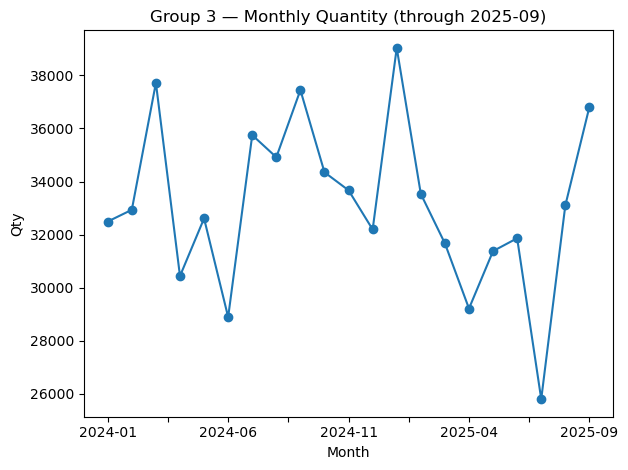

In [89]:
# 1) See available Item Groups
print("Available Item Groups:")
print(list_item_groups())

# 2) Choose ONE group to plot (edit the string if you want another)
series_name = "Group 3"

# 3) Plot its monthly history up to the latest actual month
ax = plot_monthly_series(
    dfs["OPT1_TRAIN"],
    series_name=series_name,
    title=f"{series_name} — Monthly Quantity (through {dfs['LATEST_MONTH']})",
    ylabel="Qty"
)

Available Customer Groups (first 25):
['100 percent Food Group', '89 INTERNATIONAL INC', 'A&G', 'ALWAYS FRESH INTERNATIONAL, INC.', 'AMIGOS PRODUCE', 'ANTONIO PEÑA', 'ANTUNES - SON PRODUCE, INC.', 'AVERIT', 'Agabe Foods Corp', 'American Food', 'Atlanta G&D', 'Atom Banana', 'BAYSHORE PRODUCE, LLC.', 'BC GOURMET USA', 'BEN E KEITH', 'BROTHERS PRODUCE', 'Bonafede', 'Boves', 'C&S Hatfield', 'C&S Price Chopper', 'C&S South', 'CANAAN TRADING COMPANY', 'CARBONELLA DESARBO', 'CARIBBEAN FOOD MARKET', 'CHENAIL']


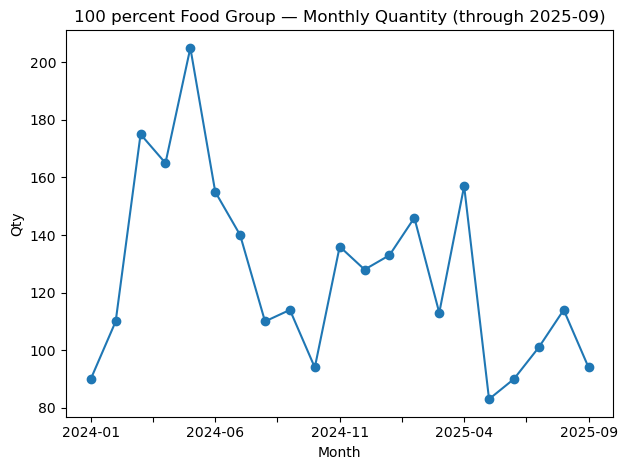

In [91]:
# 1) See available Customer Groups
print("Available Customer Groups (first 25):")
print(list_customer_groups()[:25])

# 2) Choose ONE customer group to plot (edit the string if you want another)
series_name = "100 percent Food Group"  # change me to any name from the list above

# 3) Plot its monthly history up to the latest actual month
ax = plot_monthly_series(
    dfs["OPT2_TRAIN"],
    series_name=series_name,
    title=f"{series_name} — Monthly Quantity (through {dfs['LATEST_MONTH']})",
    ylabel="Qty"
)

In [95]:
def load_sheets(file_path: str) -> Dict[str, pd.DataFrame]:
    """
    Load all project sheets from the Excel file and fix headers consistently.
    Returns a dict of dataframes: Base, Customers, Items, Working Days, Temperature, Frecuency
    """
    # --- helpers kept local so this function is self-contained ---
    def tidy_columns(df):
        df = df.copy()
        df.columns = [str(c).strip() for c in df.columns]
        empty_cols = [c for c in df.columns if df[c].isna().all()]
        df = df.drop(columns=empty_cols)
        unnamed = [c for c in df.columns if str(c).lower().startswith("unnamed")]
        df = df.drop(columns=unnamed)
        return df

    def detect_header_row(df, max_check=12, min_non_null=2):
        best_i, best_score = 0, -1
        nrows = min(max_check, len(df))
        for i in range(nrows):
            row = df.iloc[i]
            non_null = int(row.notna().sum())
            if non_null < min_non_null:
                continue
            str_like = sum(isinstance(x, str) for x in row)
            as_str = row.dropna().astype(str)
            uniq_ratio = (as_str.nunique() / non_null) if non_null else 0.0
            score = (str_like / max(non_null, 1)) * 2.0 + uniq_ratio
            if score > best_score:
                best_i, best_score = i, score
        return best_i

    xls = pd.ExcelFile(file_path)

    # --- Base ---
    # Preview without headers to detect the header row (works even if it moves)
    base_preview = pd.read_excel(file_path, sheet_name="Base", header=None, nrows=12)
    base_hdr = detect_header_row(base_preview)
    base = pd.read_excel(file_path, sheet_name="Base", header=base_hdr)
    base = tidy_columns(base)

    # --- Customers ---
    customers = pd.read_excel(file_path, sheet_name="Customers", header=1, usecols=[0,1,2])
    customers = customers.reset_index(drop=True)
    # Promote first row to header, fill 3rd name if blank -> "Share"
    cust_cols = customers.iloc[0].tolist()
    if len(cust_cols) >= 3 and (pd.isna(cust_cols[2]) or str(cust_cols[2]).strip().lower() == "nan"):
        cust_cols[2] = "Share"
    customers = customers.iloc[1:].reset_index(drop=True)
    customers.columns = cust_cols
    customers = tidy_columns(customers)

    # --- Items ---
    items = pd.read_excel(file_path, sheet_name="Items", header=1, usecols=[0,1,2])
    items = items.reset_index(drop=True)
    item_cols = items.iloc[0].tolist()
    items = items.iloc[1:].reset_index(drop=True)
    items.columns = item_cols
    items = tidy_columns(items)

    # --- Working Days ---
    working_days = pd.read_excel(file_path, sheet_name="Working Days", header=0)
    working_days = tidy_columns(working_days)

    # --- Temperature ---
    temperature = pd.read_excel(file_path, sheet_name="Temperature", header=0)
    temperature = tidy_columns(temperature)
    # Rename lone column '1' (100% factor) → 'TempFactor'
    if list(temperature.columns) == [1] or list(temperature.columns) == ["1"]:
        temperature.columns = ["TempFactor"]
    # ensure numeric
    if "TempFactor" in temperature.columns:
        temperature["TempFactor"] = pd.to_numeric(temperature["TempFactor"], errors="coerce")

    # --- Frecuency ---
    frecuency = pd.read_excel(file_path, sheet_name="Frecuency", header=0)
    frecuency = tidy_columns(frecuency)

    return {
        "Base": base,
        "Customers": customers,
        "Items": items,
        "Working Days": working_days,
        "Temperature": temperature,
        "Frecuency": frecuency,
    }

# Smoke test on your current file (non-destructive)
dfs_loader_test = load_sheets("Jan-Aug_ SOP Sept-Dec (1).xlsx")
for k, v in dfs_loader_test.items():
    print(f"{k:14s} -> {v.shape} | columns: {list(v.columns)[:5]}...")

C:\Users\redae\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


Base           -> (180943, 28) | columns: ['Customer ID', 'Customer Name', 'Shipto Name', 'Customer PO #', 'Delivery Date']...
Customers      -> (188, 3) | columns: ['Row Labels', 'Sum of Total Sales', 'Share']...
Items          -> (200, 3) | columns: ['Itemcode', 'Item Description', 'Sum of Total Sales']...
Working Days   -> (25, 2) | columns: ['Month', 'Days']...
Temperature    -> (3, 1) | columns: ['TempFactor']...
Frecuency      -> (197, 18) | columns: ['Customers', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']...


In [97]:
def parse_mixed_excel_date_strict(raw_series):
    """Parse strings like '2025-09-30' and Excel serials like 45930 correctly."""
    s = raw_series.copy()
    as_num = pd.to_numeric(s, errors="coerce")
    is_num = as_num.notna()
    is_str = ~is_num
    out = pd.Series(pd.NaT, index=s.index, dtype="datetime64[ns]")
    out.loc[is_str] = pd.to_datetime(s.loc[is_str], errors="coerce")
    if is_num.any():
        out.loc[is_num] = pd.to_datetime(as_num.loc[is_num], unit="D", origin="1899-12-30")
    return out

def normalize_base_to_fact(base_df: pd.DataFrame):
    """
    Input: raw 'Base' sheet as loaded by load_sheets()
    Output: dict with:
      - FACT: Month_ym, Quantity, Itemcode, Group, Customer Group (actuals only)
      - Base_actuals: Base rows flagged as actuals
      - Base_SOP: Base rows flagged as S&OP
    """
    b = base_df.copy()

    # 1) Parse Delivery Date properly and build Month_ym from it
    b["Delivery Date"] = parse_mixed_excel_date_strict(b["Delivery Date"])
    b["Month_ym"] = b["Delivery Date"].dt.to_period("M").astype(str)

    # 2) Flag S&OP vs actuals from the 'Month' string
    month_str = b["Month"].astype(str).str.strip()
    is_valid_ym = month_str.str.match(r"^\d{4}-(?:0?[1-9]|1[0-2])$")
    b["is_sop"] = ~is_valid_ym

    # 3) Split
    b_actuals = b.loc[~b["is_sop"]].copy()
    b_sop     = b.loc[b["is_sop"]].copy()

    # 4) Impute missing Group in actuals by dominant group per Itemcode, else 'Group Unknown'
    dom_group = (
        b_actuals.dropna(subset=["Group"])
                 .groupby("Itemcode")["Group"]
                 .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else pd.NA)
    )
    miss_mask = b_actuals["Group"].isna()
    b_actuals.loc[miss_mask, "Group"] = b_actuals.loc[miss_mask, "Itemcode"].map(dom_group)
    b_actuals["Group"] = b_actuals["Group"].fillna("Group Unknown")

    # 5) Standardize key fields (types/whitespace)
    b_actuals["Itemcode"] = b_actuals["Itemcode"].astype(str).str.strip()
    b_actuals["Group"] = b_actuals["Group"].astype(str).str.strip()
    b_actuals["Customer Group"] = b_actuals["Customer Group"].astype(str).str.strip()
    b_actuals["Month_ym"] = pd.PeriodIndex(b_actuals["Month_ym"], freq="M").astype(str)
    b_actuals["Quantity"] = pd.to_numeric(b_actuals["Quantity"], errors="coerce").fillna(0)

    # 6) Canonical FACT used by both models
    fact = b_actuals[["Month_ym", "Quantity", "Itemcode", "Group", "Customer Group"]].copy()

    return {"FACT": fact, "Base_actuals": b_actuals, "Base_SOP": b_sop}

# --- tiny smoke test on the loader output from Step 39 ---
norm = normalize_base_to_fact(dfs_loader_test["Base"])
print("FACT shape:", norm["FACT"].shape)
print("Actuals/SOP:", norm["Base_actuals"].shape, "/", norm["Base_SOP"].shape)
print("FACT nulls:", norm["FACT"].isna().sum().to_dict())
print("FACT distincts:", {c: norm["FACT"][c].nunique() for c in ["Month_ym","Itemcode","Group","Customer Group"]})

FACT shape: (179366, 5)
Actuals/SOP: (179366, 30) / (1577, 30)
FACT nulls: {'Month_ym': 0, 'Quantity': 0, 'Itemcode': 0, 'Group': 0, 'Customer Group': 0}
FACT distincts: {'Month_ym': 21, 'Itemcode': 246, 'Group': 11, 'Customer Group': 233}


In [99]:
def build_export_bundle_from_fact(fact: pd.DataFrame):
    # Helper: detect latest + next month
    def latest_and_next(fact_df):
        months = pd.PeriodIndex(fact_df["Month_ym"], freq="M")
        latest = months.max()
        return str(latest), str(latest + 1)

    # Helper: seasonal naive (12-month lag) baseline
    def seasonal_naive_next(wide_df: pd.DataFrame, next_month: str, season: int = 12) -> pd.Series:
        idx = pd.Index(pd.PeriodIndex(wide_df.index, freq="M").astype(str))
        wide = wide_df.copy()
        wide.index = idx
        prev_same_month = str(pd.Period(next_month, "M") - season)
        if prev_same_month in wide.index:
            return wide.loc[prev_same_month].copy()
        latest = str(pd.Period(wide.index.max(), "M"))
        return wide.loc[latest].copy()

    # ---- Build Option 1 (Item Groups) long → full grid → wide → train ----
    opt1_long = (
        fact.groupby(["Month_ym", "Group"], as_index=False)["Quantity"]
            .sum()
            .sort_values(["Month_ym","Group"])
    )
    all_months = pd.period_range(fact["Month_ym"].min(), fact["Month_ym"].max(), freq="M").astype(str)
    all_groups = opt1_long["Group"].unique()
    idx1 = pd.MultiIndex.from_product([all_months, all_groups], names=["Month_ym","Group"])
    opt1_full = (
        opt1_long.set_index(["Month_ym","Group"])
                 .reindex(idx1, fill_value=0)
                 .reset_index()
                 .sort_values(["Month_ym","Group"])
    )
    opt1_wide = (
        opt1_full.pivot(index="Month_ym", columns="Group", values="Quantity")
                 .fillna(0)
                 .sort_index()
    )

    # ---- Build Option 2 (Customer Groups) long → full grid → wide → train ----
    opt2_long = (
        fact.groupby(["Month_ym", "Customer Group"], as_index=False)["Quantity"]
            .sum()
            .sort_values(["Month_ym","Customer Group"])
    )
    all_custs = opt2_long["Customer Group"].unique()
    idx2 = pd.MultiIndex.from_product([all_months, all_custs], names=["Month_ym","Customer Group"])
    opt2_full = (
        opt2_long.set_index(["Month_ym","Customer Group"])
                 .reindex(idx2, fill_value=0)
                 .reset_index()
                 .sort_values(["Month_ym","Customer Group"])
    )
    opt2_wide = (
        opt2_full.pivot(index="Month_ym", columns="Customer Group", values="Quantity")
                 .fillna(0)
                 .sort_index()
    )

    # Latest/Next months (rolling logic)
    latest_m, next_m = latest_and_next(fact)

    # Train slices (≤ latest actual)
    opt1_train = opt1_wide.loc[:latest_m].copy()
    opt2_train = opt2_wide.loc[:latest_m].copy()

    # Baseline next-month forecasts (seasonal-naive)
    opt1_next = seasonal_naive_next(opt1_train, next_m, season=12).rename("Forecast_qty").reset_index()
    opt1_next = opt1_next.rename(columns={"index":"Group"})
    opt1_next.insert(0, "Month_ym", next_m)
    opt1_next["Source"] = "baseline_seasonal_naive_12m"

    opt2_next = seasonal_naive_next(opt2_train, next_m, season=12).rename("Forecast_qty").reset_index()
    opt2_next = opt2_next.rename(columns={"index":"Customer Group"})
    opt2_next.insert(0, "Month_ym", next_m)
    opt2_next["Source"] = "baseline_seasonal_naive_12m"

    return {
        "latest_actual_month": latest_m,
        "next_forecast_month": next_m,
        "opt1_train_wide": opt1_train,
        "opt2_train_wide": opt2_train,
        "opt1_next_baseline_long": opt1_next,
        "opt2_next_baseline_long": opt2_next,
    }

def prepare_from_excel(file_path: str):
    """One call for the app: load sheets → normalize Base → build export bundle."""
    sheets = load_sheets(file_path)
    norm = normalize_base_to_fact(sheets["Base"])
    fact = norm["FACT"]
    bundle = build_export_bundle_from_fact(fact)
    return {
        "sheets": sheets,
        "fact": fact,
        "base_actuals": norm["Base_actuals"],
        "base_sop": norm["Base_SOP"],
        "exports": bundle,
    }

# --- Smoke test on your file ---
PREP = prepare_from_excel("Jan-Aug_ SOP Sept-Dec (1).xlsx")
exp = PREP["exports"]
print("Latest/Next:", exp["latest_actual_month"], "→", exp["next_forecast_month"])
print("Train shapes:", exp["opt1_train_wide"].shape, "/", exp["opt2_train_wide"].shape)
print("Next totals :", float(exp["opt1_next_baseline_long"]["Forecast_qty"].sum()),
      "/", float(exp["opt2_next_baseline_long"]["Forecast_qty"].sum()))

C:\Users\redae\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


Latest/Next: 2025-09 → 2025-10
Train shapes: (21, 11) / (21, 233)
Next totals : 175335.0 / 175335.0


In [103]:
# Reuse our WAPE (defined earlier). If not in memory, uncomment below:
# def wape(actual: pd.Series, forecast: pd.Series) -> float:
#     a = actual.fillna(0).astype(float)
#     f = forecast.reindex(a.index).fillna(0).astype(float)
#     denom = a.sum()
#     num = (a - f).abs().sum()
#     return float(num / denom) if denom > 0 else float("nan")

def ensure_month_index(wide_df: pd.DataFrame) -> pd.DataFrame:
    """Ensure monthly string index 'YYYY-MM', sorted ascending."""
    idx = pd.PeriodIndex(wide_df.index, freq="M")
    out = wide_df.copy()
    out.index = idx.astype(str)
    return out.sort_index()

def make_eval_months(
    wide_df: pd.DataFrame,
    min_train: int = 12,
    last_k: int = 3
) -> List[str]:
    """
    Pick evaluation months with at least `min_train` months of history before each.
    Returns the last `last_k` eligible months (e.g., last 3).
    """
    df = ensure_month_index(wide_df)
    months = pd.PeriodIndex(df.index, freq="M")
    eligible = [str(m) for i, m in enumerate(months) if i >= min_train]
    return eligible[-last_k:]

def backtest_one_step(
    wide_df: pd.DataFrame,
    eval_months: List[str],
    forecaster: Callable[[pd.DataFrame, str], pd.Series],
    metric: Callable[[pd.Series, pd.Series], float] = wape
) -> pd.DataFrame:
    """
    Generic one-step-ahead backtest engine.
    For each eval month `m`, trains on all months ≤ (m-1), forecasts `m`, scores with `metric`.
    """
    df = ensure_month_index(wide_df)
    rows = []
    for m in eval_months:
        m_prev = str(pd.Period(m, "M") - 1)
        train = df.loc[:m_prev].copy()
        actual = df.loc[m]
        fc = forecaster(train, m)  # <- any model implementing this signature
        score = metric(actual, fc)
        rows.append({"month": m, "wape": score, "wape_pct": score * 100.0})
    return pd.DataFrame(rows)

# Baseline forecaster adapter (already implemented earlier)
def forecaster_seasonal_naive(train: pd.DataFrame, target_month: str, season: int = 12) -> pd.Series:
    return seasonal_naive_next(train, target_month, season=season)

# Placeholder for Step 44 (Holt-Winters ML forecaster)
def forecaster_holt_winters(train: pd.DataFrame, target_month: str, **kwargs) -> pd.Series:
    """
    Will be implemented in Step 44 using statsmodels.tsa.holtwinters.ExponentialSmoothing.
    Signature is compatible with backtest_one_step().
    """
    raise NotImplementedError("Implemented in Step 44")

# ---- Tiny, non-heavy smoke: just propose eval months (no modeling) ----
opt1_eval_months = make_eval_months(dfs["OPT1_TRAIN"], min_train=12, last_k=3)
opt2_eval_months = make_eval_months(dfs["OPT2_TRAIN"], min_train=12, last_k=3)

print("Suggested eval months — Items (Groups):", opt1_eval_months)
print("Suggested eval months — Customers (Customer Groups):", opt2_eval_months)

Suggested eval months — Items (Groups): ['2025-07', '2025-08', '2025-09']
Suggested eval months — Customers (Customer Groups): ['2025-07', '2025-08', '2025-09']


In [107]:
def holt_winters_forecast_one(y: pd.Series, steps_ahead: int = 1,
                              season_length: int = 12, trend="add", seasonal="add") -> pd.Series:
    """
    Fit Holt-Winters to a single monthly series y and forecast steps_ahead.
    Robust: falls back to last value if model cannot be fit.
    """
    y = y.astype(float).fillna(0.0)
    # Degenerate guardrails
    if y.nunique(dropna=True) < 2 or len(y) < season_length + 2:
        last = float(y.iloc[-1]) if len(y) else 0.0
        return pd.Series([last] * steps_ahead, index=range(steps_ahead))
    try:
        model = ExponentialSmoothing(
            y, trend=trend, seasonal=seasonal, seasonal_periods=season_length,
            initialization_method="estimated"
        )
        fit = model.fit(optimized=True)
        fc = fit.forecast(steps_ahead)
        return pd.Series(fc.values, index=range(steps_ahead))
    except Exception:
        last = float(y.iloc[-1]) if len(y) else 0.0
        return pd.Series([last] * steps_ahead, index=range(steps_ahead))

# ----- Pick ONE group to test -----
series_name = "Group 3"   # change this if you want another group

# Latest eval month from Step 43
eval_month = "2025-09"
m_prev = str(pd.Period(eval_month, "M") - 1)

opt1_train = dfs["OPT1_TRAIN"].copy()
y_train = opt1_train.loc[:m_prev, series_name]

# 1) HW forecast for eval_month (1-step ahead)
fc_hw = holt_winters_forecast_one(y_train, steps_ahead=1, season_length=12, trend="add", seasonal="add").iloc[0]

# 2) Baseline forecast for the same month/series (seasonal naive 12m)
fc_base = forecaster_seasonal_naive(opt1_train.drop(index=eval_month), eval_month, season=12)[series_name]

# 3) Actual value to compare
actual = float(opt1_train.loc[eval_month, series_name])

# 4) Tiny metrics (single-series WAPE == |e|/actual)
err_hw   = abs(actual - fc_hw)
err_base = abs(actual - fc_base)
wape_hw   = (err_hw / actual) * 100 if actual != 0 else float("nan")
wape_base = (err_base / actual) * 100 if actual != 0 else float("nan")

print(f"Series: {series_name}")
print(f"Eval month: {eval_month}")
print(f"Actual: {actual:.2f}")
print(f"HW forecast: {fc_hw:.2f} | WAPE: {wape_hw:.2f}%")
print(f"Baseline:    {fc_base:.2f} | WAPE: {wape_base:.2f}%")

Series: Group 3
Eval month: 2025-09
Actual: 36812.00
HW forecast: 33100.17 | WAPE: 10.08%
Baseline:    37448.00 | WAPE: 1.73%


C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [109]:
# 1) Forecaster that returns a Series for ALL columns (one-step ahead)
def forecaster_holt_winters(train: pd.DataFrame, target_month: str,
                            season_length: int = 12, trend="add", seasonal="add") -> pd.Series:
    train = ensure_month_index(train)
    # For each column, fit HW and forecast 1 step; be robust to failures
    out = {}
    for col in train.columns:
        y = train[col].astype(float).fillna(0.0)
        # guardrails
        if y.nunique(dropna=True) < 2 or len(y) < season_length + 2:
            out[col] = float(y.iloc[-1]) if len(y) else 0.0
            continue
        try:
            model = ExponentialSmoothing(
                y, trend=trend, seasonal=seasonal, seasonal_periods=season_length,
                initialization_method="estimated"
            )
            fit = model.fit(optimized=True)
            out[col] = float(fit.forecast(1).iloc[0])
        except Exception:
            out[col] = float(y.iloc[-1]) if len(y) else 0.0
    # return as Series aligned to columns
    return pd.Series(out, index=train.columns)

# 2) Backtest baseline vs HW on last 3 eval months for Option 1 (Item Groups)
opt1_train = dfs["OPT1_TRAIN"]
opt1_eval_months = make_eval_months(opt1_train, min_train=12, last_k=3)

bt_base = backtest_one_step(opt1_train, opt1_eval_months, forecaster_seasonal_naive)
bt_hw   = backtest_one_step(opt1_train, opt1_eval_months, forecaster_holt_winters)

print("Eval months:", opt1_eval_months)
print("\nBaseline WAPE by month (%):")
print(bt_base[["month","wape_pct"]])
print("Baseline average WAPE (%):", round(bt_base["wape_pct"].mean(), 2))

print("\nHolt-Winters WAPE by month (%):")
print(bt_hw[["month","wape_pct"]])
print("Holt-Winters average WAPE (%):", round(bt_hw["wape_pct"].mean(), 2))

Eval months: ['2025-07', '2025-08', '2025-09']

Baseline WAPE by month (%):
     month   wape_pct
0  2025-07  30.028266
1  2025-08  22.800112
2  2025-09  21.149280
Baseline average WAPE (%): 24.66

Holt-Winters WAPE by month (%):
     month   wape_pct
0  2025-07  14.056811
1  2025-08  26.623724
2  2025-09   9.351001
Holt-Winters average WAPE (%): 16.68


C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

In [111]:
# 1) Per-series WAPE over the last K eval months
def per_series_wape(train: pd.DataFrame, eval_months, forecaster) -> pd.Series:
    train = ensure_month_index(train)
    cols = train.columns
    numer = pd.Series(0.0, index=cols)   # sum |errors|
    denom = pd.Series(0.0, index=cols)   # sum actuals
    for m in eval_months:
        m_prev = str(pd.Period(m, "M") - 1)
        subtrain = train.loc[:m_prev]
        actual_row = train.loc[m].astype(float)
        fc_row = forecaster(subtrain, m).reindex(cols).astype(float)
        numer += (actual_row - fc_row).abs()
        denom += actual_row.abs()
    wape_series = numer / denom.replace(0, np.nan)
    return wape_series

opt1_train = dfs["OPT1_TRAIN"].copy()
opt1_eval_months = make_eval_months(opt1_train, min_train=12, last_k=3)
next_month = dfs["NEXT_MONTH"]

# 2) Compute WAPE per group for baseline vs Holt-Winters
wape_base = per_series_wape(opt1_train, opt1_eval_months, forecaster_seasonal_naive) * 100
wape_hw   = per_series_wape(opt1_train, opt1_eval_months, forecaster_holt_winters) * 100

# 3) Select model per group (prefer HW if strictly lower WAPE; fallback to baseline otherwise/NaN)
methods = []
for g in opt1_train.columns:
    wb, wh = wape_base.get(g, np.nan), wape_hw.get(g, np.nan)
    if np.isfinite(wh) and (wh < wb or not np.isfinite(wb)):
        methods.append(("holt_winters", g, wh, wb))
    else:
        methods.append(("baseline", g, wb, wh))

sel_df = pd.DataFrame(methods, columns=["method_selected", "Group", "wape_selected_pct", "wape_alt_pct"])
# For clarity, rename the WAPE columns consistently
sel_df = sel_df.rename(columns={"wape_selected_pct": "wape_selected_pct", "wape_alt_pct": "wape_other_pct"})
dfs["OPT1_SELECTION"] = sel_df

print("Selection summary (first 10):")
display(sel_df.head(10))

# 4) Produce both candidate forecasts for NEXT_MONTH, then pick per group
fc_base_next = forecaster_seasonal_naive(opt1_train, next_month, season=12)
fc_hw_next   = forecaster_holt_winters(opt1_train, next_month)

# Build the chosen forecast per column
chosen = {}
for _, row in sel_df.iterrows():
    g = row["Group"]
    if row["method_selected"] == "holt_winters":
        chosen[g] = float(fc_hw_next[g])
    else:
        chosen[g] = float(fc_base_next[g])

opt1_next_mixed = pd.Series(chosen, name="Forecast_qty")
opt1_next_mixed.index.name = "Group"

# 5) Pack tidy export table (parallel to baseline format), including method used
opt1_next_mixed_long = opt1_next_mixed.reset_index()
opt1_next_mixed_long.insert(0, "Month_ym", next_month)
opt1_next_mixed_long["Source"] = opt1_next_mixed_long["Group"].map(
    sel_df.set_index("Group")["method_selected"]
).replace({"baseline": "baseline_seasonal_naive_12m",
           "holt_winters": "ml_holt_winters"})

dfs["OPT1_NEXT_MIXED_LONG"] = opt1_next_mixed_long

print("Next-month (Items/Groups) — mixed model rows:", opt1_next_mixed_long.shape)
display(opt1_next_mixed_long.head(8))

print("\nTotals check — baseline vs mixed:")
print("Baseline total:", float(dfs["EXPORT_OPT1_NEXT"]["Forecast_qty"].sum()))
print("Mixed total   :", float(opt1_next_mixed_long["Forecast_qty"].sum()))

Selection summary (first 10):


C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

,method_selected,Group,wape_selected_pct,wape_other_pct
0,holt_winters,Group 1-1,14.976434,33.760538
1,holt_winters,Group 1-2,12.618683,28.106962
2,holt_winters,Group 1-3,13.097867,28.023266
3,holt_winters,Group 2-1,8.843916,11.920191
4,holt_winters,Group 2-2,20.212514,28.141773
5,baseline,Group 2-3,100.000000,200.000000
6,baseline,Group 3,12.959517,17.840209
7,holt_winters,Group 4,7.011070,32.171655
8,holt_winters,Group 5-1,25.899239,34.457582
9,baseline,Group 5-2,34.893871,57.136733


Next-month (Items/Groups) — mixed model rows: (11, 4)


C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

,Month_ym,Group,Forecast_qty,Source
0,2025-10,Group 1-1,21987.0,ml_holt_winters
1,2025-10,Group 1-2,27146.0,ml_holt_winters
2,2025-10,Group 1-3,19373.0,ml_holt_winters
3,2025-10,Group 2-1,21917.0,ml_holt_winters
4,2025-10,Group 2-2,17150.0,ml_holt_winters
5,2025-10,Group 2-3,0.0,baseline_seasonal_naive_12m
6,2025-10,Group 3,34350.0,baseline_seasonal_naive_12m
7,2025-10,Group 4,2443.0,ml_holt_winters



Totals check — baseline vs mixed:
Baseline total: 175335.0
Mixed total   : 165483.0


In [113]:
opt2_train = dfs["OPT2_TRAIN"].copy()

# Total volume and activity per customer group
totals = opt2_train.sum(axis=0).sort_values(ascending=False)
nonzero_months = (opt2_train > 0).sum(axis=0)

stats = (
    pd.DataFrame({"total_qty": totals, "nonzero_months": nonzero_months})
      .sort_values("total_qty", ascending=False)
)

TOP_K = 30  # you can change to 20/50 later
top_cust = stats.head(TOP_K).reset_index().rename(columns={"index": "Customer Group"})

dfs["OPT2_TOP_STATS"] = stats
dfs["OPT2_TOP_CUSTOMERS"] = top_cust["Customer Group"].tolist()

print("Total customer groups:", stats.shape[0])
print("Top-K selected      :", len(dfs['OPT2_TOP_CUSTOMERS']))
print("\nTop 15 by total quantity:")
display(top_cust.head(15))

Total customer groups: 233
Top-K selected      : 30

Top 15 by total quantity:


,Customer Group,total_qty,nonzero_months
0,Walmart Vineland,587214.000,21
1,Walmart SE,540740.000,21
2,Leasa Industries,450398.000,21
3,C&S South,215817.667,21
4,Walmart Arcadia,143631.000,21
5,MIA Independents,117164.000,21
6,PC Independents,90972.000,21
7,Iberia Food,83302.000,18
8,Vegetable Juices,78337.000,17
9,Cheney Brothers,77772.000,21


In [117]:
opt2_train = dfs["OPT2_TRAIN"].copy()
next_month = dfs["NEXT_MONTH"]

# Use TOP customers from Step 47
top_customers = dfs["OPT2_TOP_CUSTOMERS"]  # list of 30 names
eval_months = make_eval_months(opt2_train, min_train=12, last_k=3)

# 1) Compute WAPE per series (TOP only) for Baseline vs Holt-Winters
wape_base_top = per_series_wape(opt2_train[top_customers], eval_months, forecaster_seasonal_naive) * 100
wape_hw_top   = per_series_wape(opt2_train[top_customers], eval_months, forecaster_holt_winters) * 100

# 2) Select model per TOP customer (prefer HW if strictly better)
rows = []
for c in top_customers:
    wb, wh = wape_base_top.get(c, np.nan), wape_hw_top.get(c, np.nan)
    if np.isfinite(wh) and (wh < wb or not np.isfinite(wb)):
        rows.append(("holt_winters", c, wh, wb))
    else:
        rows.append(("baseline", c, wb, wh))

sel_top = pd.DataFrame(rows, columns=["method_selected", "Customer Group", "wape_selected_pct", "wape_other_pct"])
dfs["OPT2_SELECTION"] = sel_top

print("Selection summary (first 12):")
display(sel_top.head(12))

# 3) Build candidate forecasts for NEXT_MONTH
fc_base_next_all = forecaster_seasonal_naive(opt2_train, next_month, season=12)          # all 233
fc_hw_next_top   = forecaster_holt_winters(opt2_train[top_customers], next_month)        # only Top 30

# 4) Combine: TOP use chosen method; OTHERS use baseline
chosen = {}
for cg in opt2_train.columns:
    if cg in top_customers:
        method = sel_top.set_index("Customer Group").loc[cg, "method_selected"]
        if method == "holt_winters":
            chosen[cg] = float(fc_hw_next_top[cg])
        else:
            chosen[cg] = float(fc_base_next_all[cg])
    else:
        chosen[cg] = float(fc_base_next_all[cg])

opt2_next_mixed = pd.Series(chosen, name="Forecast_qty")
opt2_next_mixed.index.name = "Customer Group"

# 5) Pack tidy export table with Source column
opt2_next_mixed_long = opt2_next_mixed.reset_index()
opt2_next_mixed_long.insert(0, "Month_ym", next_month)

# Source: map for TOP, baseline for others
src_map = sel_top.set_index("Customer Group")["method_selected"].replace({
    "baseline": "baseline_seasonal_naive_12m",
    "holt_winters": "ml_holt_winters"
})
opt2_next_mixed_long["Source"] = opt2_next_mixed_long["Customer Group"].map(src_map).fillna("baseline_seasonal_naive_12m")

dfs["OPT2_NEXT_MIXED_LONG"] = opt2_next_mixed_long

print("Next-month (Customers) — mixed model rows:", opt2_next_mixed_long.shape)
display(opt2_next_mixed_long.head(8))

print("\nTotals check — baseline vs mixed:")
print("Baseline total:", float(dfs["EXPORT_OPT2_NEXT"]["Forecast_qty"].sum()))
print("Mixed total   :", float(opt2_next_mixed_long["Forecast_qty"].sum()))

Selection summary (first 12):


C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

,method_selected,Customer Group,wape_selected_pct,wape_other_pct
0,holt_winters,Walmart Vineland,17.235922,24.410820
1,baseline,Walmart SE,11.073934,17.796816
2,baseline,Leasa Industries,10.107582,10.420082
3,holt_winters,C&S South,7.878380,27.954392
4,baseline,Walmart Arcadia,23.244318,27.193966
5,baseline,MIA Independents,4.941756,8.580521
6,baseline,PC Independents,5.195186,7.572645
7,baseline,Iberia Food,59.600694,148.611111
8,baseline,Vegetable Juices,89.562290,110.816498
9,baseline,Cheney Brothers,20.916335,33.882651


C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

Next-month (Customers) — mixed model rows: (233, 4)


,Month_ym,Customer Group,Forecast_qty,Source
0,2025-10,100 percent Food Group,94.0,baseline_seasonal_naive_12m
1,2025-10,89 INTERNATIONAL INC,0.0,baseline_seasonal_naive_12m
2,2025-10,A&G,50.0,baseline_seasonal_naive_12m
3,2025-10,"ALWAYS FRESH INTERNATIONAL, INC.",242.0,baseline_seasonal_naive_12m
4,2025-10,AMIGOS PRODUCE,50.0,baseline_seasonal_naive_12m
5,2025-10,ANTONIO PEÑA,81.0,baseline_seasonal_naive_12m
6,2025-10,"ANTUNES - SON PRODUCE, INC.",1571.0,ml_holt_winters
7,2025-10,AVERIT,122.0,ml_holt_winters



Totals check — baseline vs mixed:
Baseline total: 175335.0
Mixed total   : 166790.0


In [119]:
# 1) Add ML (mixed) results + selections to the main export bundle
APP_EXPORTS["opt1_next_mixed_long"] = dfs["OPT1_NEXT_MIXED_LONG"]
APP_EXPORTS["opt2_next_mixed_long"] = dfs["OPT2_NEXT_MIXED_LONG"]
APP_EXPORTS["opt1_selection"] = dfs["OPT1_SELECTION"]
APP_EXPORTS["opt2_selection"] = dfs["OPT2_SELECTION"]

# 2) Client-facing getters that let the UI choose "baseline" or "ml"
def get_items_view(source: str = "baseline", exports=APP_EXPORTS):
    """
    source: 'baseline' or 'ml'
    returns: title, latest/next, train_wide, next_forecast_long, selection (per-group method table)
    """
    next_tbl = (
        exports["opt1_next_baseline_long"]
        if source == "baseline" else
        exports["opt1_next_mixed_long"]
    )
    return {
        "title": APP_LABELS["items_title"],
        "latest_actual_month": exports["latest_actual_month"],
        "next_forecast_month": exports["next_forecast_month"],
        "train_wide": exports["opt1_train_wide"],
        "next_forecast_long": next_tbl,           # Month_ym, Group, Forecast_qty, Source
        "selection": exports.get("opt1_selection")
    }

def get_customers_view(source: str = "baseline", exports=APP_EXPORTS):
    """
    source: 'baseline' or 'ml'
    returns: title, latest/next, train_wide, next_forecast_long, selection (per-customer method table)
    """
    next_tbl = (
        exports["opt2_next_baseline_long"]
        if source == "baseline" else
        exports["opt2_next_mixed_long"]
    )
    return {
        "title": APP_LABELS["customers_title"],
        "latest_actual_month": exports["latest_actual_month"],
        "next_forecast_month": exports["next_forecast_month"],
        "train_wide": exports["opt2_train_wide"],
        "next_forecast_long": next_tbl,           # Month_ym, Customer Group, Forecast_qty, Source
        "selection": exports.get("opt2_selection")
    }

# 3) Smoke test: compare totals for baseline vs ML
items_base = get_items_view("baseline")
items_ml   = get_items_view("ml")
custs_base = get_customers_view("baseline")
custs_ml   = get_customers_view("ml")

print("ITEMS — latest/next:", items_base["latest_actual_month"], "→", items_base["next_forecast_month"])
print("  baseline total:", float(items_base["next_forecast_long"]["Forecast_qty"].sum()))
print("  ML total     :", float(items_ml["next_forecast_long"]["Forecast_qty"].sum()))

print("CUSTOMERS — latest/next:", custs_base["latest_actual_month"], "→", custs_base["next_forecast_month"])
print("  baseline total:", float(custs_base["next_forecast_long"]["Forecast_qty"].sum()))
print("  ML total     :", float(custs_ml["next_forecast_long"]["Forecast_qty"].sum()))

# Peek first 5 rows of each next-month table the UI will show
display(items_ml["next_forecast_long"].head(5))
display(custs_ml["next_forecast_long"].head(5))

ITEMS — latest/next: 2025-09 → 2025-10
  baseline total: 175335.0
  ML total     : 165483.0
CUSTOMERS — latest/next: 2025-09 → 2025-10
  baseline total: 175335.0
  ML total     : 166790.0


,Month_ym,Group,Forecast_qty,Source
0,2025-10,Group 1-1,21987.0,ml_holt_winters
1,2025-10,Group 1-2,27146.0,ml_holt_winters
2,2025-10,Group 1-3,19373.0,ml_holt_winters
3,2025-10,Group 2-1,21917.0,ml_holt_winters
4,2025-10,Group 2-2,17150.0,ml_holt_winters


,Month_ym,Customer Group,Forecast_qty,Source
0,2025-10,100 percent Food Group,94.0,baseline_seasonal_naive_12m
1,2025-10,89 INTERNATIONAL INC,0.0,baseline_seasonal_naive_12m
2,2025-10,A&G,50.0,baseline_seasonal_naive_12m
3,2025-10,"ALWAYS FRESH INTERNATIONAL, INC.",242.0,baseline_seasonal_naive_12m
4,2025-10,AMIGOS PRODUCE,50.0,baseline_seasonal_naive_12m


In [121]:
def apply_total_calibration(forecast_long: pd.DataFrame, target_total: float, source_suffix: str):
    """
    Scale 'Forecast_qty' so the table's total equals target_total.
    Adds a suffix to 'Source' to record calibration.
    Returns (calibrated_df, factor).
    """
    df = forecast_long.copy()
    cur_total = float(df["Forecast_qty"].sum())
    if cur_total <= 0 or target_total <= 0:
        # nothing to do or unsafe to scale
        df["Source"] = df["Source"].astype(str) + source_suffix + "_skipped"
        return df, 1.0

    factor = target_total / cur_total
    df["Forecast_qty"] = df["Forecast_qty"] * factor
    df["Source"] = df["Source"].astype(str) + source_suffix
    return df, float(factor)

# 1) Items (Groups): calibrate ML to baseline total
items_base_total = float(APP_EXPORTS["opt1_next_baseline_long"]["Forecast_qty"].sum())
items_ml_df      = APP_EXPORTS["opt1_next_mixed_long"]
items_ml_cal, items_factor = apply_total_calibration(
    items_ml_df, items_base_total, source_suffix="+calibrated_to_baseline_total"
)
APP_EXPORTS["opt1_next_ml_calibrated_long"] = items_ml_cal

# 2) Customers (Customer Groups): calibrate ML to baseline total
cust_base_total = float(APP_EXPORTS["opt2_next_baseline_long"]["Forecast_qty"].sum())
cust_ml_df      = APP_EXPORTS["opt2_next_mixed_long"]
cust_ml_cal, cust_factor = apply_total_calibration(
    cust_ml_df, cust_base_total, source_suffix="+calibrated_to_baseline_total"
)
APP_EXPORTS["opt2_next_ml_calibrated_long"] = cust_ml_cal

# 3) Print factors & totals so you can decide if you’ll expose a checkbox in the app
print("ITEMS — calibration factor:", round(items_factor, 6))
print("  baseline total:", items_base_total)
print("  ML total     :", float(items_ml_df["Forecast_qty"].sum()))
print("  ML calibrated:", float(items_ml_cal["Forecast_qty"].sum()))

print("\nCUSTOMERS — calibration factor:", round(cust_factor, 6))
print("  baseline total:", cust_base_total)
print("  ML total     :", float(cust_ml_df["Forecast_qty"].sum()))
print("  ML calibrated:", float(cust_ml_cal["Forecast_qty"].sum()))

ITEMS — calibration factor: 1.059535
  baseline total: 175335.0
  ML total     : 165483.0
  ML calibrated: 175334.99999999997

CUSTOMERS — calibration factor: 1.051232
  baseline total: 175335.0
  ML total     : 166790.0
  ML calibrated: 175335.0


In [123]:
def get_items_view(source: str = "baseline", exports=APP_EXPORTS):
    """
    source ∈ {'baseline','ml','ml_calibrated'}
    returns: title, latest/next, train_wide, next_forecast_long, selection
    """
    if source == "baseline":
        next_tbl = exports["opt1_next_baseline_long"]
    elif source == "ml":
        next_tbl = exports["opt1_next_mixed_long"]
    elif source in ("ml_calibrated", "ml+calibrated"):
        next_tbl = exports["opt1_next_ml_calibrated_long"]
    else:
        raise ValueError("source must be 'baseline', 'ml', or 'ml_calibrated'")

    return {
        "title": APP_LABELS["items_title"],
        "latest_actual_month": exports["latest_actual_month"],
        "next_forecast_month": exports["next_forecast_month"],
        "train_wide": exports["opt1_train_wide"],
        "next_forecast_long": next_tbl,
        "selection": exports.get("opt1_selection"),
        "source_used": source
    }

def get_customers_view(source: str = "baseline", exports=APP_EXPORTS):
    """
    source ∈ {'baseline','ml','ml_calibrated'}
    returns: title, latest/next, train_wide, next_forecast_long, selection
    """
    if source == "baseline":
        next_tbl = exports["opt2_next_baseline_long"]
    elif source == "ml":
        next_tbl = exports["opt2_next_mixed_long"]
    elif source in ("ml_calibrated", "ml+calibrated"):
        next_tbl = exports["opt2_next_ml_calibrated_long"]
    else:
        raise ValueError("source must be 'baseline', 'ml', or 'ml_calibrated'")

    return {
        "title": APP_LABELS["customers_title"],
        "latest_actual_month": exports["latest_actual_month"],
        "next_forecast_month": exports["next_forecast_month"],
        "train_wide": exports["opt2_train_wide"],
        "next_forecast_long": next_tbl,
        "selection": exports.get("opt2_selection"),
        "source_used": source
    }

# Quick smoke: compare totals across the three modes
for mode in ["baseline", "ml", "ml_calibrated"]:
    iv = get_items_view(mode)
    cv = get_customers_view(mode)
    print(f"\nMODE = {mode}")
    print(" Items total:", float(iv["next_forecast_long"]["Forecast_qty"].sum()))
    print(" Custs total:", float(cv["next_forecast_long"]["Forecast_qty"].sum()))


MODE = baseline
 Items total: 175335.0
 Custs total: 175335.0

MODE = ml
 Items total: 165483.0
 Custs total: 166790.0

MODE = ml_calibrated
 Items total: 175334.99999999997
 Custs total: 175335.0


In [127]:
import importlib
import notebook_exports as yne

importlib.reload(yne)  # ensure latest code is loaded

# Use the same Excel file you’ve been using
prep_mod = yne.prepare_from_excel("Jan-Aug_ SOP Sept-Dec (1).xlsx")
exp_mod = prep_mod["exports"]

print("Latest/Next:", exp_mod["latest_actual_month"], "→", exp_mod["next_forecast_month"])
print("Train shapes:", exp_mod["opt1_train_wide"].shape, "/", exp_mod["opt2_train_wide"].shape)

# Compare totals across modes (should match what we saw earlier)
for mode in ["baseline", "ml", "ml_calibrated"]:
    iv = yne.get_items_view(mode, exp_mod)
    cv = yne.get_customers_view(mode, exp_mod)
    itot = float(iv["next_forecast_long"]["Forecast_qty"].sum())
    ctot = float(cv["next_forecast_long"]["Forecast_qty"].sum())
    print(f"MODE={mode} | Items total={itot} | Customers total={ctot}")

# Confirm selection tables exist for ML modes
sel1 = exp_mod.get("opt1_selection")
sel2 = exp_mod.get("opt2_selection")
print("Items selection rows:", 0 if sel1 is None else sel1.shape)
print("Customers selection rows:", 0 if sel2 is None else sel2.shape)

C:\Users\redae\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates

Latest/Next: 2025-09 → 2025-10
Train shapes: (21, 11) / (21, 233)
MODE=baseline | Items total=175335.0 | Customers total=175335.0
MODE=ml | Items total=165483.0 | Customers total=166790.0
MODE=ml_calibrated | Items total=175334.99999999997 | Customers total=175335.0
Items selection rows: (11, 4)
Customers selection rows: (30, 4)


C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\redae\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

In [129]:
import importlib
import notebook_exports as yne
importlib.reload(yne)

prep_mod = yne.prepare_from_excel("Jan-Aug_ SOP Sept-Dec (1).xlsx")
exp_mod = prep_mod["exports"]

for mode in ["baseline", "ml", "ml_calibrated"]:
    iv = yne.get_items_view(mode, exp_mod)
    cv = yne.get_customers_view(mode, exp_mod)
    print(f"MODE={mode}",
          "| Items total=", float(iv["next_forecast_long"]["Forecast_qty"].sum()),
          "| Custs total=", float(cv["next_forecast_long"]["Forecast_qty"].sum()))

C:\Users\redae\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


MODE=baseline | Items total= 175335.0 | Custs total= 175335.0
MODE=ml | Items total= 165483.0 | Custs total= 166790.0
MODE=ml_calibrated | Items total= 175334.99999999997 | Custs total= 175335.0


In [131]:
import importlib, notebook_exports as yne
importlib.reload(yne)

prep_mod = yne.prepare_from_excel("Jan-Aug_ SOP Sept-Dec (1).xlsx")
exp_mod = prep_mod["exports"]

# 1) List a couple names
print("Item groups (first 5):", yne.list_item_groups(exp_mod)[:5])
print("Customer groups (first 5):", yne.list_customer_groups(exp_mod)[:5])

# 2) History sample for one item group
g = "Group 3"
hist = yne.series_history(exp_mod, view="items", name=g)
print("History rows for", g, ":", hist.shape)
print(hist.head(3).to_string(index=False))

# 3) Next forecast for that group under three modes
for mode in ["baseline","ml","ml_calibrated"]:
    v = yne.series_next_forecast(exp_mod, view="items", name=g, source=mode)
    print(f"Next {mode} forecast for {g}: {v}")

C:\Users\redae\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


Item groups (first 5): ['Group 1-1', 'Group 1-2', 'Group 1-3', 'Group 2-1', 'Group 2-2']
Customer groups (first 5): ['100 percent Food Group', '89 INTERNATIONAL INC', 'A&G', 'ALWAYS FRESH INTERNATIONAL, INC.', 'AMIGOS PRODUCE']
History rows for Group 3 : (21, 2)
Month_ym  Quantity
 2024-01   32493.0
 2024-02   32936.0
 2024-03   37719.0
Next baseline forecast for Group 3: 34350.0
Next ml forecast for Group 3: 34350.0
Next ml_calibrated forecast for Group 3: 36395.02093870669


In [133]:
import importlib, notebook_exports as yne
importlib.reload(yne)

# This triggers the Excel read (where the warning used to show)
_ = yne.load_sheets("Jan-Aug_ SOP Sept-Dec (1).xlsx")
print("openpyxl warning suppressed ✅")

openpyxl warning suppressed ✅


In [3]:
def to_month_ym(s):
    """Normalize ANY month strings like '2025-1' → '2025-01' as YYYY-MM."""
    return pd.PeriodIndex(pd.Series(s).astype(str), freq="M").astype(str)

def auto_working_days_from_range(start_ym: str, end_ym: str) -> pd.DataFrame:
    """Mon–Fri working days per month from start_ym..end_ym (inclusive)."""
    months = pd.period_range(start_ym, end_ym, freq="M")
    rows = []
    for m in months:
        start = m.to_timestamp()
        end = (m + 1).to_timestamp() - pd.Timedelta(days=1)
        # count business days: include last day → add 1 day to end bound
        days = int(np.busday_count(start.date(), (end + pd.Timedelta(days=1)).date()))
        rows.append((str(m), days))
    return pd.DataFrame(rows, columns=["Month_ym", "Days"])


In [5]:
# Replace these with the first and last YYYY-MM that exist in YOUR data range
wd_demo = auto_working_days_from_range('2024-01', '2024-12')
wd_demo

,Month_ym,Days
0,2024-01,23
1,2024-02,21
2,2024-03,21
3,2024-04,22
4,2024-05,23
5,2024-06,20
6,2024-07,23
7,2024-08,22
8,2024-09,21
9,2024-10,23


In [7]:
# Make root-level modules importable
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from notebook_exports import prepare_from_excel

# Pick the first .xlsx found at project root (simple & safe if there's only one)
candidates = sorted(glob.glob(os.path.join(project_root, "*.xlsx")))
if not candidates:
    raise FileNotFoundError("No .xlsx found at project root. Put your data file there and re-run.")
EXCEL_PATH = candidates[0]
print("Using Excel:", os.path.basename(EXCEL_PATH))

prep = prepare_from_excel(EXCEL_PATH)

mn = prep["fact"]["Month_ym"].min()
mx = prep["fact"]["Month_ym"].max()
mn, mx


Using Excel: Jan-Aug_ SOP Sept-Dec (1).xlsx


('2024-01', '2025-09')

In [13]:
# 1) Modeling range from your already-prepared facts
mn = prep["fact"]["Month_ym"].min()
mx = prep["fact"]["Month_ym"].max()

# 2) Try to read "Working Days" sheet; if missing, auto-compute Mon–Fri
try:
    xl = pd.ExcelFile(EXCEL_PATH)
    if "Working Days" in xl.sheet_names:
        wd_raw = pd.read_excel(EXCEL_PATH, sheet_name="Working Days")
        # standardize to Month_ym / Days
        wd = (wd_raw.rename(columns={"Month": "Month_ym", "month": "Month_ym", "Days": "Days", "days": "Days"})
                    [["Month_ym", "Days"]].dropna())
        wd["Month_ym"] = to_month_ym(wd["Month_ym"])
        wd["Days"] = wd["Days"].astype(int)
        source = "sheet"
    else:
        raise KeyError("no 'Working Days' sheet")
except Exception:
    wd = auto_working_days_from_range(mn, mx)
    source = "auto"

print("WD source:", source, "| range:", mn, "→", mx, "| rows:", len(wd))
wd.head(3), wd.tail(3)

WD source: auto | range: 2024-01 → 2025-09 | rows: 21


(  Month_ym  Days
 0  2024-01    23
 1  2024-02    21
 2  2024-03    21,
    Month_ym  Days
 18  2025-07    23
 19  2025-08    21
 20  2025-09    22)

In [15]:
# 1) Map Month_ym -> Days
wd_map = dict(zip(wd["Month_ym"], wd["Days"]))

fact = prep["fact"].copy()
fact["Month_ym"] = fact["Month_ym"].astype(str)
fact["Days"] = fact["Month_ym"].map(wd_map)

# 2) Quick sanity check (should be 0)
missing = int(fact["Days"].isna().sum())
print("Missing WD joins:", missing)

# 3) Detect your quantity column
qty_candidates = ["Quantity", "Qty", "quantity", "qty", "Total_Qty", "TotalQty", "Total"]
qty_col = next((c for c in qty_candidates if c in fact.columns), None)
if qty_col is None:
    raise KeyError(f"Could not find a quantity column among {qty_candidates}. Columns are: {list(fact.columns)}")

# 4) Build rate
fact["Rate_per_day"] = fact[qty_col] / fact["Days"]

# 5) Preview a compact sample
key_cols = [c for c in ["GroupType","Group","ItemGroup","Customer","Series"] if c in fact.columns]
preview_cols = ["Month_ym"] + key_cols + [qty_col, "Days", "Rate_per_day"]
fact[preview_cols].head(8)

Missing WD joins: 0


,Month_ym,Group,Quantity,Days,Rate_per_day
0,2025-09,Group 3,2640.0,22,120.000000
1,2025-05,Group 5-2,1242.0,22,56.454545
2,2025-05,Group 3,1440.0,22,65.454545
3,2025-06,Group 3,1440.0,21,68.571429
4,2025-05,Group 5-2,1224.0,22,55.636364
5,2025-07,Group 3,80.0,23,3.478261
6,2025-09,Group 3,1440.0,22,65.454545
7,2025-06,Group 5-2,1330.0,21,63.333333


In [17]:
# Monthly totals + rates per series (Series if present, else Group)
series_key = "Series" if "Series" in fact.columns else ("Group" if "Group" in fact.columns else None)
if series_key is None:
    raise KeyError("Neither 'Series' nor 'Group' found in fact columns.")

monthly = (
    fact.groupby(["Month_ym", series_key], as_index=False)[qty_col].sum()
        .rename(columns={qty_col: "Quantity"})
)
monthly["Days"] = monthly["Month_ym"].map(wd_map)
monthly["Rate"] = monthly["Quantity"] / monthly["Days"]

print("Series key:", series_key,
      "| rows:", len(monthly),
      "| unique series:", monthly[series_key].nunique())
monthly.head(8)

Series key: Group | rows: 196 | unique series: 11


,Month_ym,Group,Quantity,Days,Rate
0,2024-01,Group 1-1,15288.0,23,664.695652
1,2024-01,Group 1-2,21770.0,23,946.521739
2,2024-01,Group 1-3,22601.0,23,982.652174
3,2024-01,Group 2-1,27505.0,23,1195.869565
4,2024-01,Group 2-2,20932.0,23,910.086957
5,2024-01,Group 2-3,55.0,23,2.391304
6,2024-01,Group 3,32493.0,23,1412.739130
7,2024-01,Group 4,27.0,23,1.173913


In [21]:
# 1) Wide matrix of Rates (Months x Series)
rate_wide = (
    monthly.pivot(index="Month_ym", columns=series_key, values="Rate")
           .fillna(0.0)
)
rate_wide = ensure_month_index(rate_wide)

# 2) Next month after your last actual
next_m = str(pd.Period(mx, "M") + 1)

# 3) Working days for next month (use precomputed map or auto-compute if missing)
if next_m in wd_map:
    next_days = int(wd_map[next_m])
else:
    next_days = int(auto_working_days_from_range(next_m, next_m).iloc[0]["Days"])

print("Next month:", next_m, "| working days:", next_days, "| shape:", rate_wide.shape)
rate_wide.tail(3)

Next month: 2025-10 | working days: 23 | shape: (21, 11)


Group,Group 1-1,Group 1-2,Group 1-3,Group 2-1,Group 2-2,Group 2-3,Group 3,Group 4,Group 5-1,Group 5-2,Group Unknown
Month_ym,,,,,,,,,,,
2025-07,1085.565217,1377.217391,943.782609,1012.347826,973.913043,0.000000,1121.739130,109.739130,566.000000,231.326087,0.0
2025-08,966.857143,1241.333333,868.333333,1014.666667,733.857143,3.761905,1576.198381,111.904762,1042.285714,82.333333,0.0
2025-09,999.409091,1233.909091,880.590909,996.227273,779.545455,0.000000,1673.272727,111.045455,785.318182,116.965909,0.0


In [25]:
# Baseline (seasonal naive) at RATE level → convert to TOTALS with next month's WD
baseline_rate = seasonal_naive_next(rate_wide, next_m)  # <-- pass next_m
baseline_qty = (baseline_rate * next_days).round().astype(int)

wd_forecast_baseline = baseline_qty.reset_index()
wd_forecast_baseline.columns = [series_key, "Forecast_qty_WD_baseline"]

print(f"Built baseline WD forecast for {len(wd_forecast_baseline)} series → month {next_m} ({next_days} working days).")
wd_forecast_baseline.head(10)

Built baseline WD forecast for 11 series → month 2025-10 (23 working days).


,Group,Forecast_qty_WD_baseline
0,Group 1-1,13328
1,Group 1-2,21870
2,Group 1-3,27722
3,Group 2-1,25481
4,Group 2-2,21189
5,Group 2-3,0
6,Group 3,34350
7,Group 4,1900
8,Group 5-1,25655
9,Group 5-2,3840


In [27]:
# Holt–Winters at RATE level → convert to TOTALS with next month's WD
hw_rate = forecaster_holt_winters(rate_wide, next_m)  # returns a Series of next-month rates per series
hw_qty = (hw_rate * next_days).round().astype(int)

wd_forecast_hw = hw_qty.reset_index()
wd_forecast_hw.columns = [series_key, "Forecast_qty_WD_HW"]

print(f"Built HW WD forecast for {len(wd_forecast_hw)} series → month {next_m} ({next_days} working days).")
wd_forecast_hw.head(10)

Built HW WD forecast for 11 series → month 2025-10 (23 working days).


,Group,Forecast_qty_WD_HW
0,Group 1-1,22986
1,Group 1-2,28380
2,Group 1-3,20254
3,Group 2-1,22913
4,Group 2-2,17930
5,Group 2-3,0
6,Group 3,38485
7,Group 4,2554
8,Group 5-1,18062
9,Group 5-2,2690


In [29]:
# Merge baseline + HW WD forecasts for the next month
wd_forecasts = (
    wd_forecast_baseline.merge(wd_forecast_hw, on=series_key, how="outer")
        .fillna(0)
        .astype({"Forecast_qty_WD_baseline": int, "Forecast_qty_WD_HW": int})
)
wd_forecasts.insert(0, "Month_ym", next_m)
wd_forecasts.insert(1, "Working_Days", next_days)

print("WD forecast table → rows:", len(wd_forecasts), "| cols:", list(wd_forecasts.columns))
wd_forecasts.head(12)

WD forecast table → rows: 11 | cols: ['Month_ym', 'Working_Days', 'Group', 'Forecast_qty_WD_baseline', 'Forecast_qty_WD_HW']


,Month_ym,Working_Days,Group,Forecast_qty_WD_baseline,Forecast_qty_WD_HW
0,2025-10,23,Group 1-1,13328,22986
1,2025-10,23,Group 1-2,21870,28380
2,2025-10,23,Group 1-3,27722,20254
3,2025-10,23,Group 2-1,25481,22913
4,2025-10,23,Group 2-2,21189,17930
5,2025-10,23,Group 2-3,0,0
6,2025-10,23,Group 3,34350,38485
7,2025-10,23,Group 4,1900,2554
8,2025-10,23,Group 5-1,25655,18062
9,2025-10,23,Group 5-2,3840,2690


In [31]:
# Build classic (non-WD) monthly quantity matrix
qty_wide = (
    monthly.pivot(index="Month_ym", columns=series_key, values="Quantity")
           .fillna(0.0)
)
qty_wide = ensure_month_index(qty_wide)

# Classic forecasts on TOTALS (no WD)
classic_baseline = seasonal_naive_next(qty_wide, next_m).round().astype(int)
classic_hw = forecaster_holt_winters(qty_wide, next_m).round().astype(int)

# Pack and compare with WD versions we already computed
classic_baseline_df = classic_baseline.rename("Forecast_qty_baseline").reset_index()
classic_hw_df = classic_hw.rename("Forecast_qty_HW").reset_index()

compare = (
    wd_forecasts
      .merge(classic_baseline_df, on=series_key, how="left")
      .merge(classic_hw_df, on=series_key, how="left")
      .sort_values(series_key)
      .reset_index(drop=True)
)

print("Next month:", next_m, "| working days used:", next_days)
compare.head(12)

Next month: 2025-10 | working days used: 23


,Month_ym,Working_Days,Group,Forecast_qty_WD_baseline,Forecast_qty_WD_HW,Forecast_qty_baseline,Forecast_qty_HW
0,2025-10,23,Group 1-1,13328,22986,13328,21987
1,2025-10,23,Group 1-2,21870,28380,21870,27146
2,2025-10,23,Group 1-3,27722,20254,27722,19373
3,2025-10,23,Group 2-1,25481,22913,25481,21917
4,2025-10,23,Group 2-2,21189,17930,21189,17150
5,2025-10,23,Group 2-3,0,0,0,0
6,2025-10,23,Group 3,34350,38485,34350,36812
7,2025-10,23,Group 4,1900,2554,1900,2443
8,2025-10,23,Group 5-1,25655,18062,25655,17277
9,2025-10,23,Group 5-2,3840,2690,3840,2573


In [33]:
# Totals for next-month across all series
totals = {
    "classic_baseline_total": int(compare["Forecast_qty_baseline"].sum()),
    "classic_hw_total":       int(compare["Forecast_qty_HW"].sum()),
    "wd_baseline_total":      int(compare["Forecast_qty_WD_baseline"].sum()),
    "wd_hw_total":            int(compare["Forecast_qty_WD_HW"].sum()),
}
totals, {k+"_Δvs_classic_baseline": v - totals["classic_baseline_total"] for k, v in totals.items()}

({'classic_baseline_total': 175335,
  'classic_hw_total': 166678,
  'wd_baseline_total': 175335,
  'wd_hw_total': 174254},
 {'classic_baseline_total_Δvs_classic_baseline': 0,
  'classic_hw_total_Δvs_classic_baseline': -8657,
  'wd_baseline_total_Δvs_classic_baseline': 0,
  'wd_hw_total_Δvs_classic_baseline': -1081})

In [35]:
# Calibrate WD_HW to match the classic (non-WD) baseline total
target = int(compare["Forecast_qty_baseline"].sum())           # calibration target
curr = int(wd_forecasts["Forecast_qty_WD_HW"].sum())           # current WD HW total
scale = (target / curr) if curr > 0 else 1.0                   # scaling factor

scaled = wd_forecasts["Forecast_qty_WD_HW"].astype(float) * scale
base = np.floor(scaled).astype(int)
residue = int(target - base.sum())

# Distribute the rounding residue to hit the target exactly
if residue != 0:
    frac = (scaled - base).to_numpy()
    order = np.argsort(-frac) if residue > 0 else np.argsort(frac)
    idx = order[:abs(residue)]
    base.iloc[idx] += 1 if residue > 0 else -1

wd_forecasts["Forecast_qty_WD_HW_calibrated"] = base

print("WD HW before:", curr,
      "| target (classic baseline):", target,
      "| after:", int(base.sum()),
      "| scale:", round(scale, 6))

wd_forecasts[["Group",
              "Forecast_qty_WD_baseline",
              "Forecast_qty_WD_HW",
              "Forecast_qty_WD_HW_calibrated"]].head(10)

WD HW before: 174254 | target (classic baseline): 175335 | after: 175335 | scale: 1.006204


,Group,Forecast_qty_WD_baseline,Forecast_qty_WD_HW,Forecast_qty_WD_HW_calibrated
0,Group 1-1,13328,22986,23128
1,Group 1-2,21870,28380,28556
2,Group 1-3,27722,20254,20380
3,Group 2-1,25481,22913,23055
4,Group 2-2,21189,17930,18041
5,Group 2-3,0,0,0
6,Group 3,34350,38485,38724
7,Group 4,1900,2554,2570
8,Group 5-1,25655,18062,18174
9,Group 5-2,3840,2690,2707


In [43]:
# 1) Build WD “next groups” tables matching the app’s expected schema
wd_next_baseline = wd_forecasts[["Month_ym","Group","Forecast_qty_WD_baseline"]].rename(
    columns={"Forecast_qty_WD_baseline":"Forecast_qty"}
).copy()
wd_next_baseline["Source"] = "wd_baseline_rate_x_days"

wd_next_hw_cal = wd_forecasts[["Month_ym","Group","Forecast_qty_WD_HW_calibrated"]].rename(
    columns={"Forecast_qty_WD_HW_calibrated":"Forecast_qty"}
).copy()
wd_next_hw_cal["Source"] = "wd_hw_rate_x_days+calibrated_to_classic_baseline"

# 2) Make a working copy of your existing exports bundle and inject WD versions
wd_bundle = copy.deepcopy(prep["exports"])
wd_bundle["opt1_next_baseline_long"] = wd_next_baseline
wd_bundle["opt1_next_ml_calibrated_long"] = wd_next_hw_cal   # reuse calibrated slot

# 3) Allocate to Itemcodes using the same share logic as Part 1
alloc_wd_baseline = get_itemcodes_allocated_view(mode="baseline", exports=wd_bundle)
alloc_wd_cal      = get_itemcodes_allocated_view(mode="ml_calibrated", exports=wd_bundle)

# 4) Quick integrity checks (sums must match)
g_sum_baseline = (alloc_wd_baseline["next_forecast_long"]
                  .groupby("Group")["Forecast_qty"].sum().sort_index())
g_sum_cal      = (alloc_wd_cal["next_forecast_long"]
                  .groupby("Group")["Forecast_qty"].sum().sort_index())
src_baseline   = wd_next_baseline.groupby("Group")["Forecast_qty"].sum().sort_index()
src_cal        = wd_next_hw_cal.groupby("Group")["Forecast_qty"].sum().sort_index()

chk_baseline = int((g_sum_baseline - src_baseline).abs().sum())
chk_cal      = int((g_sum_cal      - src_cal).abs().sum())

print("Allocated WD — groups OK deltas:",
      "baseline:", chk_baseline, "| calibrated:", chk_cal,
      "| rows baseline:", len(alloc_wd_baseline["next_forecast_long"]),
      "| rows calibrated:", len(alloc_wd_cal["next_forecast_long"]))

Allocated WD — groups OK deltas: baseline: 0 | calibrated: 0 | rows baseline: 246 | rows calibrated: 246


In [45]:
# Store WD artifacts in the same bundle structure the app reads, without overwriting classics
prep["exports"]["wd_meta"] = {
    "wd_source": source,           # "sheet" or "auto"
    "range_min": mn,
    "range_max": mx,
    "next_month": next_m,
    "next_days": int(next_days),
}

# Group-level (for any summary views you have)
prep["exports"]["wd_groups_next"] = wd_forecasts.copy()

# Itemcode-level (what the app already expects to render)
prep["exports"]["wd_next_baseline_long"]   = alloc_wd_baseline["next_forecast_long"].copy()
prep["exports"]["wd_next_calibrated_long"] = alloc_wd_cal["next_forecast_long"].copy()

print("WD package saved → keys:",
      "wd_meta, wd_groups_next, wd_next_baseline_long, wd_next_calibrated_long")

WD package saved → keys: wd_meta, wd_groups_next, wd_next_baseline_long, wd_next_calibrated_long


In [47]:
from importlib import reload
import notebook_exports as ne
reload(ne);

prep = ne.prepare_from_excel(EXCEL_PATH)
exports = prep["exports"]
print("WD keys present:",
      all(k in exports for k in ["wd_meta","wd_groups_next","wd_next_baseline_long","wd_next_calibrated_long"]))
exports["wd_meta"]

WD keys present: True


{'wd_source': 'auto',
 'range_min': '2024-01',
 'range_max': '2025-09',
 'next_month': '2025-10',
 'next_days': 23}

In [49]:
# Detect Option 2 series key and existing export keys
fact = prep["fact"]
series2_key = "Customer" if "Customer" in fact.columns else ("CustomerGroup" if "CustomerGroup" in fact.columns else None)
print("Option2 series key:", series2_key, "| unique:", fact[series2_key].nunique() if series2_key else None)

opt2_keys = [k for k in exports.keys() if k.startswith("opt2_")]
print("Existing opt2 export keys:", opt2_keys)

Option2 series key: None | unique: None
Existing opt2 export keys: ['opt2_train_wide', 'opt2_next_baseline_long', 'opt2_next_mixed_long', 'opt2_selection', 'opt2_next_ml_calibrated_long']


In [51]:
train2 = exports["opt2_train_wide"]
long2  = exports["opt2_next_baseline_long"]

print("opt2_train_wide shape:", train2.shape)
print("opt2_train_wide first 8 cols:", list(train2.columns[:8]))

print("opt2_next_baseline_long cols:", list(long2.columns))

opt2_train_wide shape: (21, 233)
opt2_train_wide first 8 cols: ['100 percent Food Group', '89 INTERNATIONAL INC', 'A&G', 'ALWAYS FRESH INTERNATIONAL, INC.', 'AMIGOS PRODUCE', 'ANTONIO PEÑA', 'ANTUNES - SON PRODUCE, INC.', 'AVERIT']
opt2_next_baseline_long cols: ['Month_ym', 'Customer Group', 'Forecast_qty', 'Source']


In [55]:
# 1) Monthly totals (already wide): rows = months, cols = customers
train2 = exports["opt2_train_wide"].copy()
train2 = ensure_month_index(train2)  # ensure YYYY-MM month index

# 2) Working days per month for the training range (Mon–Fri, no holidays)
months = train2.index.astype(str)
wd_counts = [
    len(pd.date_range(pd.Period(m, "M").start_time,
                      pd.Period(m, "M").end_time, freq="B"))
    for m in months
]
days_s = pd.Series(wd_counts, index=months, name="Days")

# 3) Convert totals → rates (qty / working day)
rate_wide_opt2 = train2.div(days_s, axis=0)

print("opt2 rate_wide shape:", rate_wide_opt2.shape,
      "| months:", len(rate_wide_opt2.index),
      "| customers:", len(rate_wide_opt2.columns))
rate_wide_opt2.tail(3).iloc[:, :8]

opt2 rate_wide shape: (21, 233) | months: 21 | customers: 233


Customer Group,100 percent Food Group,89 INTERNATIONAL INC,A&G,"ALWAYS FRESH INTERNATIONAL, INC.",AMIGOS PRODUCE,ANTONIO PEÑA,"ANTUNES - SON PRODUCE, INC.",AVERIT
Month_ym,,,,,,,,
2025-07,4.391304,0.0,0.521739,8.913043,1.739130,0.000000,70.521739,34.173913
2025-08,5.428571,0.0,0.000000,0.000000,0.952381,3.714286,65.000000,38.952381
2025-09,4.272727,0.0,0.000000,0.909091,3.454545,0.000000,71.409091,5.545455


In [59]:
# Detect the series column name used by Option 2 long format (e.g., "Customer Group")
series2_key = [c for c in exports["opt2_next_baseline_long"].columns
               if c not in ["Month_ym","Forecast_qty","Source"]][0]

# Next month + working days from wd_meta
next_m = exports["wd_meta"]["next_month"]
next_days = int(exports["wd_meta"]["next_days"])

# Baseline on RATES → totals with WD
baseline_rate2 = seasonal_naive_next(rate_wide_opt2, next_m)  # Series indexed by customer names
wd2_baseline_qty = (baseline_rate2 * next_days).round().astype(int).rename("Forecast_qty").reset_index()
wd2_baseline_qty.insert(0, "Month_ym", next_m)
if "index" in wd2_baseline_qty.columns:
    wd2_baseline_qty = wd2_baseline_qty.rename(columns={"index": series2_key})

print(f"Built Option2 WD baseline for {len(wd2_baseline_qty)} customers → month {next_m} ({next_days} days).")
wd2_baseline_qty.head(5)

Built Option2 WD baseline for 233 customers → month 2025-10 (23 days).


,Month_ym,Customer Group,Forecast_qty
0,2025-10,100 percent Food Group,94
1,2025-10,89 INTERNATIONAL INC,0
2,2025-10,A&G,50
3,2025-10,"ALWAYS FRESH INTERNATIONAL, INC.",242
4,2025-10,AMIGOS PRODUCE,50


In [63]:
# Detect series name used in Option 2 long format (e.g., "Customer Group")
series2_key = [c for c in exports["opt2_next_baseline_long"].columns
               if c not in ["Month_ym","Forecast_qty","Source"]][0]

# Next month + WD (from meta)
next_m   = exports["wd_meta"]["next_month"]
next_days = int(exports["wd_meta"]["next_days"])

# 1) Holt–Winters on RATES → convert to TOTALS with WD
hw_rate2 = forecaster_holt_winters(rate_wide_opt2, next_m)  # Series indexed by customer names
wd2_hw_float = hw_rate2 * next_days                         # float totals before calibration

# 2) Calibrate to classic (non-WD) Option-2 baseline total
target2 = int(exports["opt2_next_baseline_long"]["Forecast_qty"].sum())
curr2   = float(wd2_hw_float.sum())
scale2  = (target2 / curr2) if curr2 > 0 else 1.0

scaled = wd2_hw_float.values * scale2
base   = np.floor(scaled).astype(int)
residue = target2 - int(base.sum())
if residue != 0:
    frac  = scaled - base
    order = np.argsort(-frac) if residue > 0 else np.argsort(frac)
    base[order[:abs(residue)]] += 1 if residue > 0 else -1

# 3) Build long dataframes and stash for the app
wd2_baseline_long = wd2_baseline_qty.copy()
wd2_baseline_long["Source"] = "wd_baseline_rate_x_days"

wd2_hw_cal_long = (
    pd.DataFrame({series2_key: hw_rate2.index, "Forecast_qty": base})
      .assign(Month_ym=next_m, Source="wd_hw_rate_x_days+calibrated_to_classic_baseline")
      .loc[:, ["Month_ym", series2_key, "Forecast_qty", "Source"]]
)

exports["wd_opt2_next_baseline_long"]   = wd2_baseline_long
exports["wd_opt2_next_calibrated_long"] = wd2_hw_cal_long

print(f"Option2 WD HW (calibrated): before {int(curr2)} → target {target2} → after {int(wd2_hw_cal_long['Forecast_qty'].sum())} | rows {len(wd2_hw_cal_long)} | next {next_m} ({next_days} days).")

Option2 WD HW (calibrated): before 174254 → target 175335 → after 175335 | rows 233 | next 2025-10 (23 days).


In [65]:
from importlib import reload
import notebook_exports as ne
reload(ne);

prep = ne.prepare_from_excel(EXCEL_PATH)
exports = prep["exports"]
print("Opt2 WD keys present:",
      all(k in exports for k in ["wd_opt2_next_baseline_long","wd_opt2_next_calibrated_long"]))
print("Opt2 WD rows:", len(exports["wd_opt2_next_calibrated_long"]))

Opt2 WD keys present: True
Opt2 WD rows: 233


In [20]:
import os, sys, glob, importlib

# Make sure project root is importable
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Pick the Excel at project root
candidates = sorted(glob.glob(os.path.join(project_root, "*.xlsx")))
if not candidates:
    raise FileNotFoundError("No .xlsx found at project root.")
EXCEL_PATH = candidates[0]
print("Using Excel:", os.path.basename(EXCEL_PATH))

import notebook_exports as ne
importlib.reload(ne);

prep = ne.prepare_from_excel(EXCEL_PATH)
g = prep["exports"]["wd_groups_next"]
print("Has _to_WD column:", "Forecast_qty_WD_HW_calibrated_to_WD" in g.columns)
g[["Month_ym","Group","Forecast_qty_WD_baseline",
   "Forecast_qty_WD_HW_calibrated",
   "Forecast_qty_WD_HW_calibrated_to_WD"]].head(8)


Using Excel: Jan-Aug_ SOP Sept-Dec (1).xlsx
Has _to_WD column: True


,Month_ym,Group,Forecast_qty_WD_baseline,Forecast_qty_WD_HW_calibrated,Forecast_qty_WD_HW_calibrated_to_WD
0,2025-10,Group 1-1,13328,23129,23129
1,2025-10,Group 1-2,21870,28556,28556
2,2025-10,Group 1-3,27722,20379,20379
3,2025-10,Group 2-1,25481,23055,23055
4,2025-10,Group 2-2,21189,18041,18041
5,2025-10,Group 2-3,0,0,0
6,2025-10,Group 3,34350,38724,38724
7,2025-10,Group 4,1900,2570,2570
